
#**Combined Assignment - Data Cleaning, Feature Selection, Modeling, and Interpretability into one report**

##**Abstract**


The purpose of this notebook is to create a comprehensive report that combines Data Cleaning, Feature Selection, Modeling, and Interpretability analysis for the "Avocado Prices" dataset.

To achieve this, I started with data preprocessing tasks, such as cleaning the data, handling missing values, and encoding categorical variables. I also engaged in exploratory data analysis to identify patterns, trends, and relationships within the dataset.

I used H2O.ai for building predictive models and interpreting them. Throughout this notebook, I have applied various methods and techniques to understand the differences between the models I generated, as well as to examine the dataset before and after converting it into an H2O data frame.

#**About the Dataset**

The data represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the data reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the data reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this data.


Dataset Name: **Avocado Prices**

Taken from: **Kaggle**

**This dataset has 1649 observations with 22 variables.**

###**Column Descriptions:**

In the given dataset, there are several columns that provide information about Hass avocados and their sales. Here's a description of each of the relevant columns:

1. **Date**: This column represents the date of the observation, indicating when the avocado sales data was recorded.

2. **AveragePrice**: This column contains the average price of a single avocado. It represents the typical cost of one avocado.

3. **Total Volume**: This column indicates the total number of avocados sold. It represents the overall quantity of avocados sold in a given observation.

4. **4046**: This column represents the total number of avocados with PLU (Product Lookup) code 4046 sold. PLU codes are used to identify specific types of avocados, and 4046 is one such code.

5. **4225**: Similar to the "4046" column, this column represents the total number of avocados with PLU code 4225 sold.

6. **4770**: This column indicates the total number of avocados with PLU code 4770 sold.

7. **Total Bags**: This column represents the total number of bags of avocados sold. It includes all types of bags, such as small, large, and extra-large bags.

8. **Small Bags**: This column specifies the number of small bags of avocados sold.

9. **Large Bags**: This column specifies the number of large bags of avocados sold.

10. **XLarge Bags**: This column specifies the number of extra-large bags of avocados sold.

11. **type**: This column indicates the type of avocados sold, which can be either "conventional" or "organic." It differentiates between avocados grown using different farming practices.

12. **year**: This column represents the year of the observation, providing the year in which the avocado sales data was recorded.

13. **region**: This column specifies the city or region where the avocado sales data was collected. It identifies the location of the observation.

These columns provide information about avocado sales, including pricing, volume, type (conventional or organic), and geographical location (region) of the sales data. The PLU codes (4046, 4225, 4770) are used to categorize avocados based on their variety or type.

In [111]:
#importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats


In [112]:
#reading the dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Pritika-24/Combined-Data-Cleaning-Feature-Selection-Modeling-and-Interpretability/main/avocado.csv')

In [113]:
#displaying the dataset
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [114]:
#printing the number of observations and variables in the dataset
print(f"Dataset has {df.shape[0]} observations with {df.shape[1]} variables.")

Dataset has 18249 observations with 14 variables.


## **Data Cleaning**

In [115]:
#exploring the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [116]:
df.isnull().sum() #checking for missing values
df.isna().sum() #checking for Nan values

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no missing values or NaN values in this dataset, hence we do not need to apply methods to fill in the vacancy.

In [117]:
#gives us the list of numerical columns and categorical columns
numerical_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",numerical_col)

categorical_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",categorical_col)

Numerical columns: 
 Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')
Categorical columns: 
 Index(['Date', 'type', 'region'], dtype='object')


In [118]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of columns to label encode
columns_to_encode = ['Date', 'type', 'region']

# Apply label encoding to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [119]:
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,83.997096,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,15.481045,48.787638,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,10.000000,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,24.000000,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,38.000000,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,52.000000,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000



Since the "Unnamed: 0" column does not really contribute in determining the Total Volume of the Avocados, we can go ahead and drop that column.

In [120]:
df = df.drop(columns=['Unnamed: 0'])

In [121]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,83.997096,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,48.787638,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


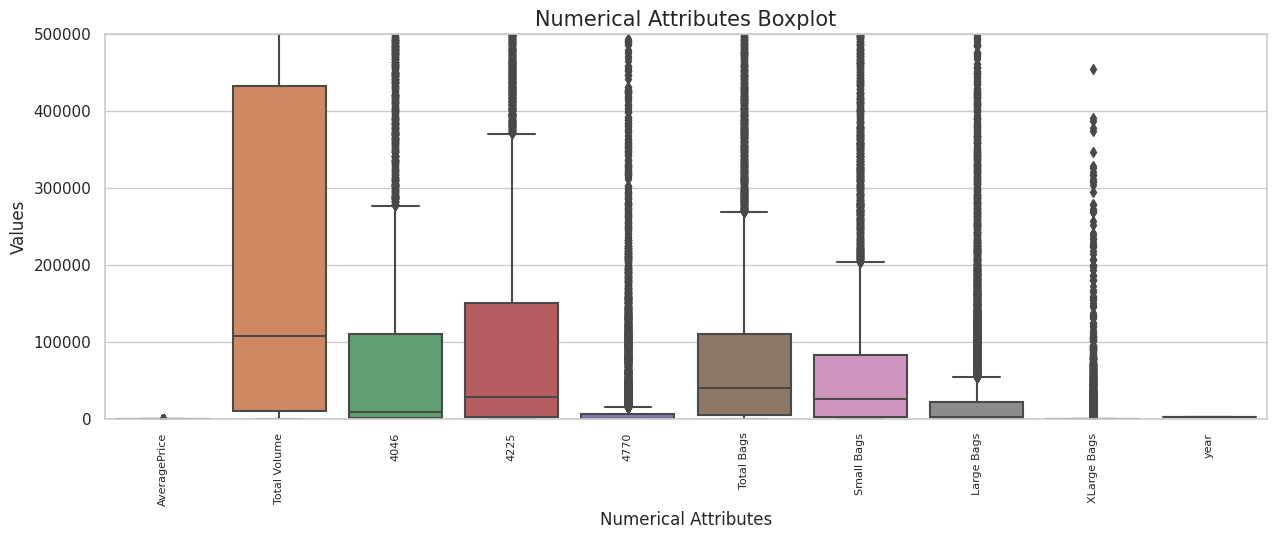

In [122]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']])
plt.ylim(0, 500000) # set y-axis range

labels = ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']
plt.xticks(range(len(labels)), labels, rotation=90, fontsize=8)


plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()


### **Using the Q-Q plot we will get a clear idea of the distribution of the Numerical columns**  

<Figure size 400x300 with 0 Axes>

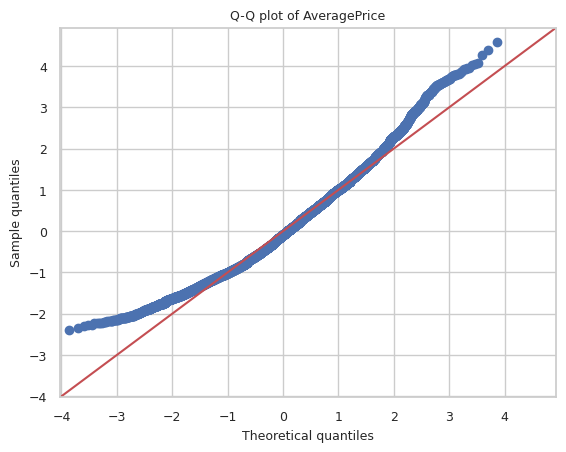

<Figure size 400x300 with 0 Axes>

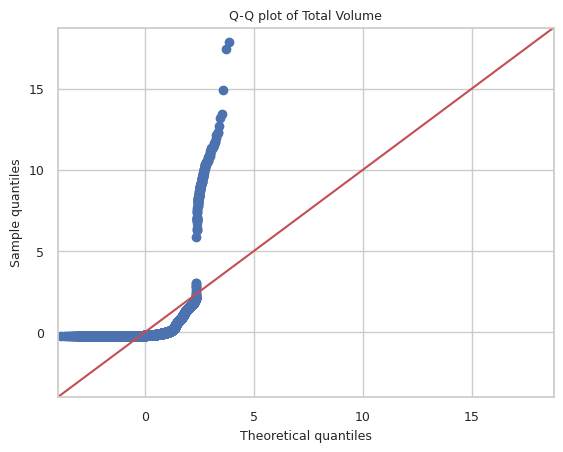

<Figure size 400x300 with 0 Axes>

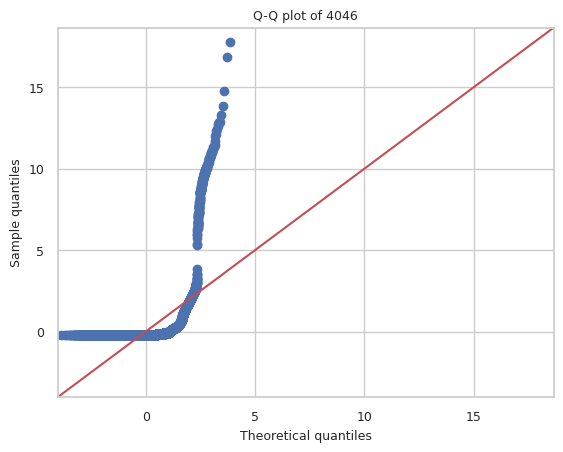

<Figure size 400x300 with 0 Axes>

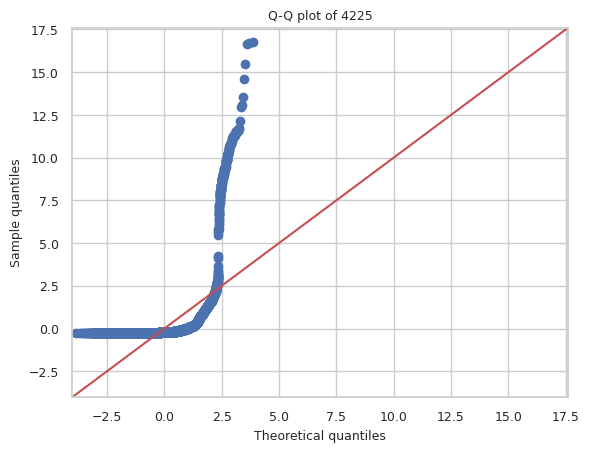

<Figure size 400x300 with 0 Axes>

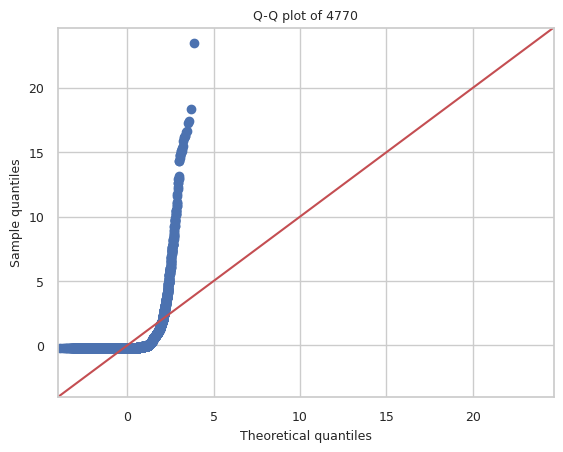

<Figure size 400x300 with 0 Axes>

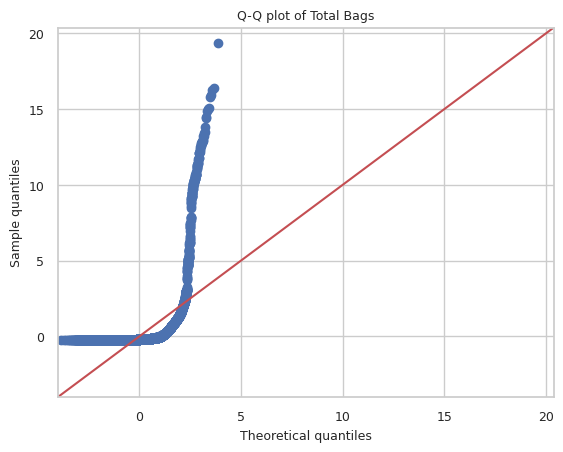

<Figure size 400x300 with 0 Axes>

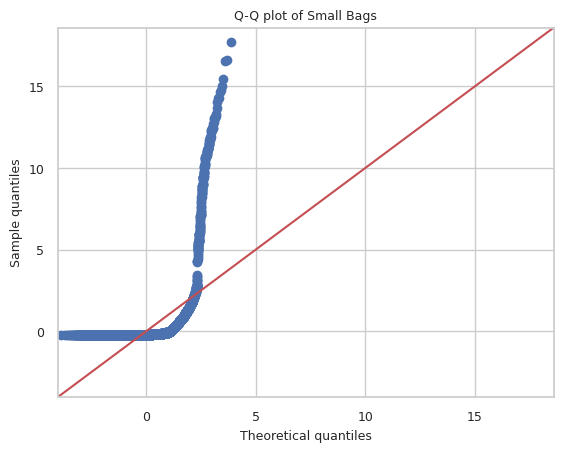

<Figure size 400x300 with 0 Axes>

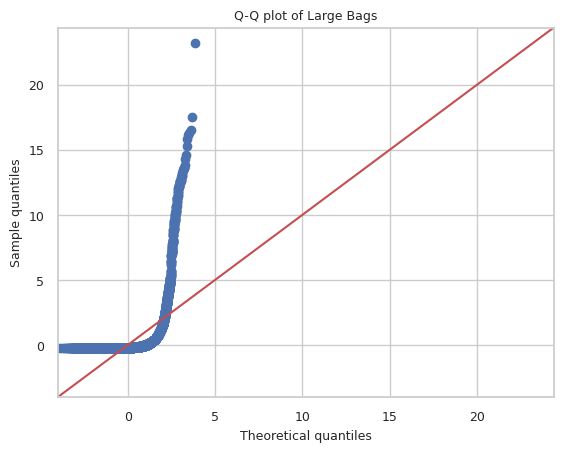

<Figure size 400x300 with 0 Axes>

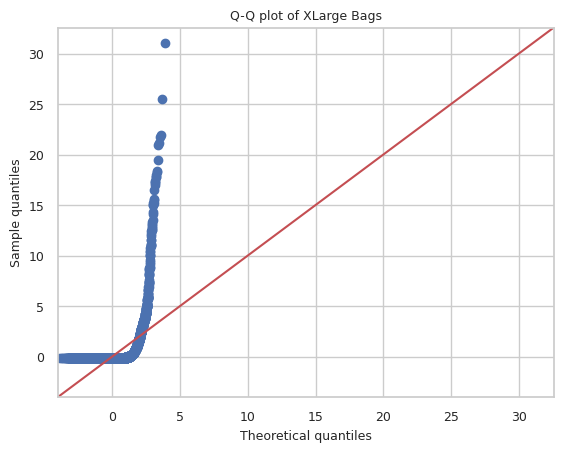

<Figure size 400x300 with 0 Axes>

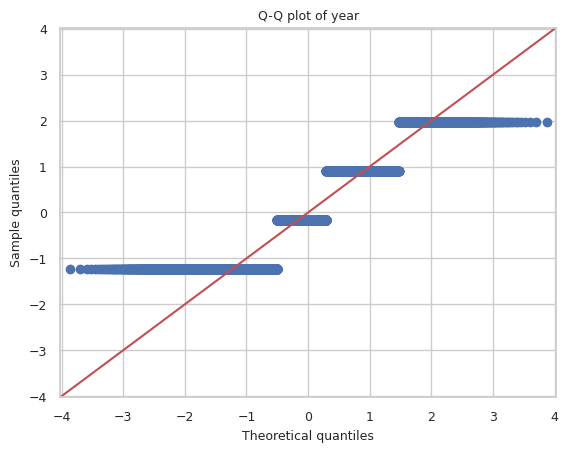

In [123]:
from statsmodels.graphics.gofplots import qqplot
df_norm=df[['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]

for c in df_norm.columns[:]:
  plt.figure(figsize=(4,3))
  fig=qqplot(df_norm[c],line='45',fit='True')
  plt.xticks(fontsize=9)
  plt.yticks(fontsize=9)
  plt.xlabel("Theoretical quantiles",fontsize=9)
  plt.ylabel("Sample quantiles",fontsize=9)
  plt.title("Q-Q plot of {}".format(c),fontsize=9)
  plt.grid(True)
  plt.show()

From above quantile plots we can suggest that while Average Price might have a near normal distribution rest of them don't.

We can also notice outliers clearly in the plots.

##Correlation Analysis

In [124]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101
AveragePrice,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,0.077374,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281


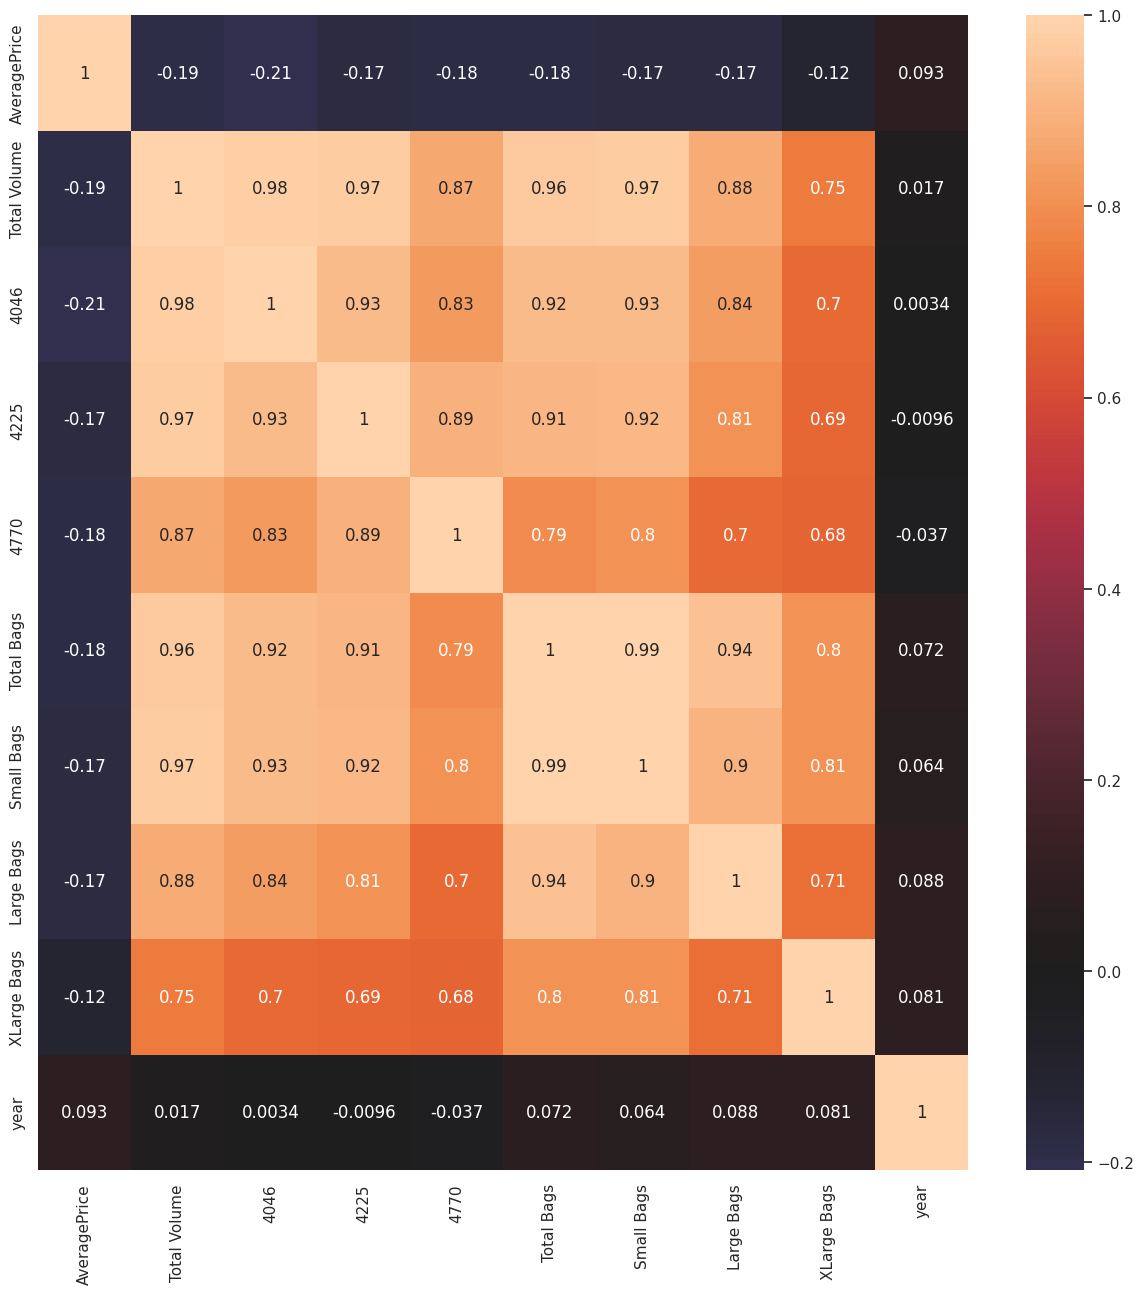

In [125]:
numerical_col = [col for col in numerical_col if col != 'Unnamed: 0']
plt.figure(figsize=(15,15))
p = sns.heatmap(df[numerical_col].corr(), annot=True, center=0)


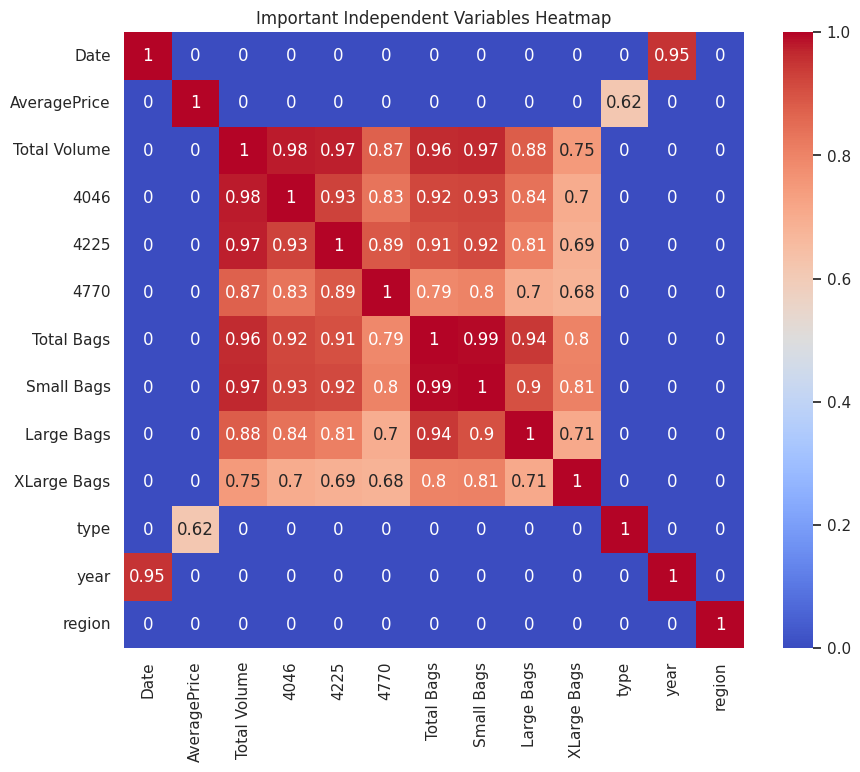

In [126]:
correlation_matrix = df.corr()

# Set a threshold for correlation strength (e.g., absolute correlation coefficient >= 0.5)
correlation_threshold = 0.5

# Filter out the important independent variables
important_variables = correlation_matrix[abs(correlation_matrix) >= correlation_threshold].fillna(0)

# Create a heatmap to visualize the relationships
plt.figure(figsize=(10, 8))
sns.heatmap(important_variables, annot=True, cmap='coolwarm')
plt.title('Important Independent Variables Heatmap')
plt.show()

As we can from the heatmap above, all the Features are not correleted with the Average Price column, instead most of them are correlated with each other.

The correlation close to 1 indicates that it is strongly correlated, and the values closer to 0 are a weak correlation.

This narrows down the list of possible predictors to start with for modelling.

Text(0.5, 1.0, 'Total Volume Plot')

<Figure size 1200x800 with 0 Axes>

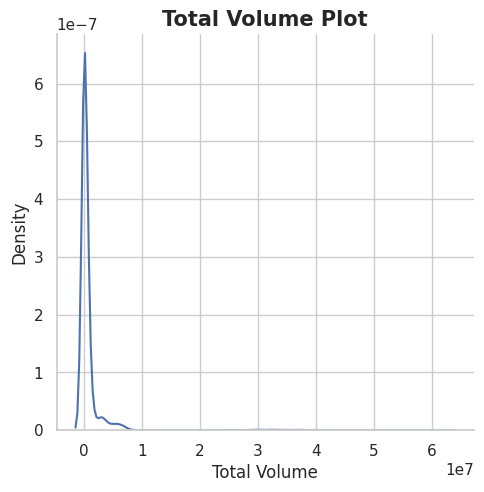

In [127]:
# Plotting Life expectancy plot with life expectancy on x axis and density on y axis

plt.figure(figsize=(12,8))
sns.displot(df['Total Volume'], kind="kde")
plt.title("Total Volume Plot", size=15, weight='bold')

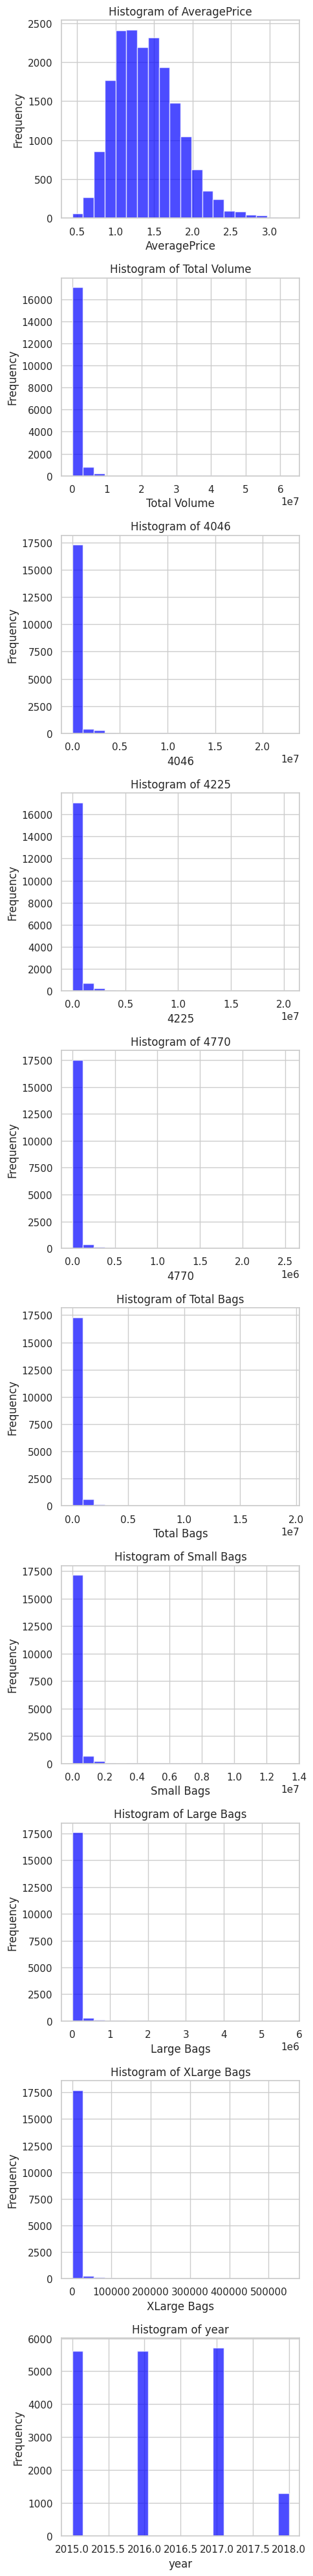

In [128]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_names' is a list of column names you want to plot
column_names = ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']

# Set the number of bins for the histograms (adjust as needed)
num_bins = 20

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(column_names), ncols=1, figsize=(5, 4 * len(column_names)))

# Loop through each variable and create a histogram
for i, column in enumerate(column_names):
    ax = axes[i]

    # Plot the histogram
    ax.hist(df[column], bins=num_bins, color='blue', alpha=0.7)

    # Set labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## **Feature Selection**

Using Eli5

In [129]:
!pip install eli5

In [130]:
from sklearn.model_selection import train_test_split

X = df[['AveragePrice', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]
y = df['Total Volume']

# Spliting data into Training 75%, Validation set 15% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [131]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [132]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.2543 ± 0.0063,4225
0.2488 ± 0.0089,4046
0.0331 ± 0.0004,Small Bags
0.0311 ± 0.0011,Total Bags
0.0035 ± 0.0001,Large Bags
0.0019 ± 0.0000,4770
0.0000 ± 0.0000,XLarge Bags
0.0000 ± 0.0000,year
0.0000 ± 0.0000,AveragePrice


Eli5 clearly shows us the features that are necessary for the prediction of the target variable: Total Volume.

Using OLS

In [133]:
import statsmodels.api as sm

# Assuming X is your feature matrix and y is your target variable
X = df[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]  # Specify the features
X = sm.add_constant(X)  # Add a constant (intercept) term
y = df['Total Volume']
df.dropna(inplace=True)
model = sm.OLS(y, X).fit()

# Get summary statistics of the OLS model
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Total Volume   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.964e+12
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:48:04   Log-Likelihood:                -97009.
No. Observations:               18249   AIC:                         1.940e+05
Df Residuals:                   18239   BIC:                         1.941e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4779.1214    803.275     -5.950   

In [134]:
# Defining the independent variables (features) and the dependent variable
X = df[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]  # Include all your independent variables
y = df['Total Volume']  # Replace with the name of your dependent variable

# Geting the summary of the regression model
summary = model.summary()

# Extracting p-values for each independent variable using integer indices
p_values = model.pvalues[1:]  # Exclude the constant term (intercept)

# Setting a significance level (e.g., 0.05) for feature selection.
# Variables with p-values less than or equal to this significance level are considered significant.
significance_level = 0.05

# Filtering out important independent variables based on p-values
important_vars = [var for var, p_value in zip(X.columns, p_values) if p_value < significance_level]

# Printing the important variables
print("Important Independent Variables:")
print(important_vars)

Important Independent Variables:
['AveragePrice', '4046', '4225', '4770', 'year']


Using VIF

In [135]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame 'df' with your predictor variables
# Exclude the specific column you want to ignore
exclude_column = 'Unnamed: 0'
predictors = [col for col in df.columns if col != exclude_column]

# Create a DataFrame containing only the selected predictors
X = df[predictors]

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Format the VIF values to two decimal points
vif["VIF"] = ["{:.2f}".format(value) for value in vif["VIF"]]

# Print the VIF values
print(vif)

        Variable                 VIF
0           Date                4.32
1   AveragePrice               22.71
2   Total Volume       5226351820.65
3           4046        696555529.43
4           4225        634990319.54
5           4770          4986686.14
6     Total Bags  250199979298360.88
7     Small Bags  142971416741920.50
8     Large Bags   15214863605981.41
9    XLarge Bags      78563260514.62
10          type                3.39
11          year               20.04
12        region                4.16


<Axes: xlabel='Total Volume', ylabel='AveragePrice'>

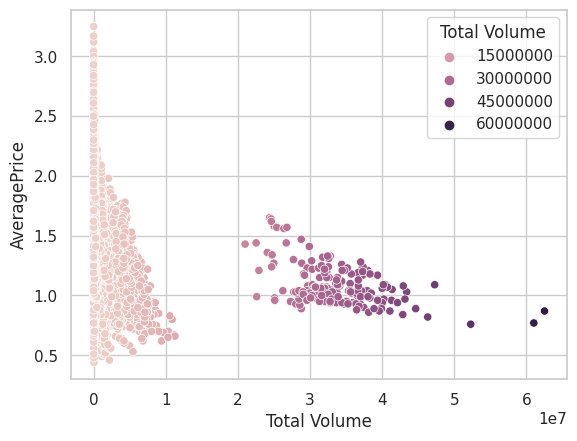

In [136]:
#scatter plot to analyze Total Volume vs Average Price

df1 = df[['Total Volume', 'AveragePrice']]
sns.scatterplot(data=df1, x= 'Total Volume', y='AveragePrice', hue='Total Volume')

<Axes: xlabel='Total Volume', ylabel='Total Bags'>

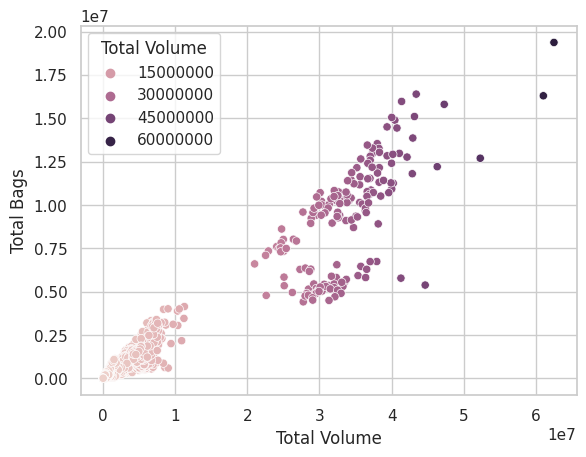

In [137]:
#scatter plot to analyze Total Volume vs Total Bags

df1 = df[['Total Volume', 'Total Bags']]
sns.scatterplot(data=df1, x= 'Total Volume', y='Total Bags', hue='Total Volume')

<Axes: xlabel='Total Volume', ylabel='region'>

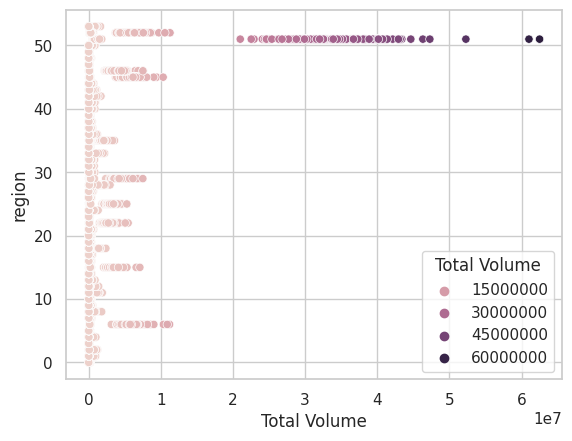

In [138]:
#scatter plot to analyze Total Volume vs region

df1 = df[['Total Volume', 'region']]
sns.scatterplot(data=df1, x= 'Total Volume', y='region', hue='Total Volume')

<Axes: xlabel='Total Volume', ylabel='4770'>

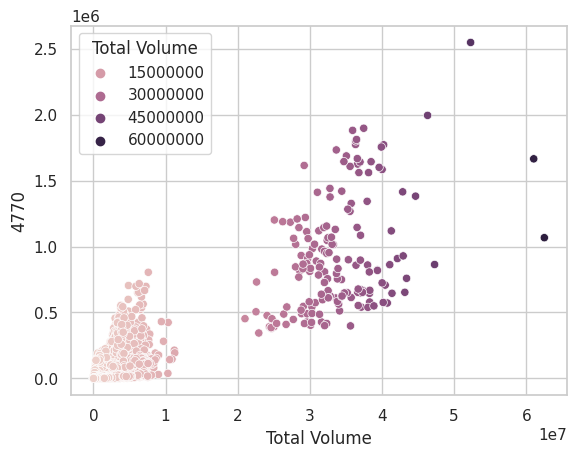

In [139]:
#scatter plot to analyze Total Volume vs Total Bags

df1 = df[['Total Volume', '4770']]
sns.scatterplot(data=df1, x= 'Total Volume', y='4770', hue='Total Volume')

### **Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

In [ ]:
# Split the data into training and test sets (80% training, 20% test)
# Split your data into features (X) and the target variable (y)
X = df.drop(columns=['Total Volume'])
y = df['Total Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

In [ ]:
#Removing the outliers
z_score_threshold = 3
data = df.copy()
for column in data.select_dtypes(include=[np.number]).columns:
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    data = data[z_scores <= z_score_threshold]

# df_no_outliers now contains the DataFrame with outliers removed

X = data.drop(columns=['Total Volume'])
y = data['Total Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Splitting the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

**Here we notice that the values of MSE (Mean Squared error) and R-squared changed significantly after we removed the outliers.**

## **Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods.**

In [141]:
#Copying the data in 'Total Volume' column into different sub columns for removing the data
data_totalvolume = data[['Total Volume']]
data_totalvolume['totalvolume_copy_1_percent'] = data[['Total Volume']]
data_totalvolume['totalvolume_copy_5_percent'] = data[['Total Volume']]
data_totalvolume['totalvolume_copy_10_percent'] = data[['Total Volume']]
data_totalvolume

<ipython-input-141-3c5bca984778>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_1_percent'] = data[['Total Volume']]
<ipython-input-141-3c5bca984778>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_5_percent'] = data[['Total Volume']]
<ipython-input-141-3c5bca984778>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,Total Volume,totalvolume_copy_1_percent,totalvolume_copy_5_percent,totalvolume_copy_10_percent
0,64236.62,64236.62,64236.62,64236.62
1,54876.98,54876.98,54876.98,54876.98
2,118220.22,118220.22,118220.22,118220.22
3,78992.15,78992.15,78992.15,78992.15
4,51039.60,51039.60,51039.60,51039.60
...,...,...,...,...
18244,17074.83,17074.83,17074.83,17074.83
18245,13888.04,13888.04,13888.04,13888.04
18246,13766.76,13766.76,13766.76,13766.76
18247,16205.22,16205.22,16205.22,16205.22


In [142]:
#Defining a function to get the missing data from the columns
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_data = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_data

In [143]:
get_percent_missing(data_totalvolume)

,column_name,percent_missing
Total Volume,Total Volume,0.0
totalvolume_copy_1_percent,totalvolume_copy_1_percent,0.0
totalvolume_copy_5_percent,totalvolume_copy_5_percent,0.0
totalvolume_copy_10_percent,totalvolume_copy_10_percent,0.0


In [144]:
#Create missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [145]:
# Create missing data in each col
create_missing(data_totalvolume, 0.01, 'totalvolume_copy_1_percent')
create_missing(data_totalvolume, 0.05, 'totalvolume_copy_5_percent')
create_missing(data_totalvolume, 0.1, 'totalvolume_copy_10_percent')

<ipython-input-144-fa51350b8831>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan


In [146]:
get_percent_missing(data_totalvolume)

,column_name,percent_missing
Total Volume,Total Volume,0.000000
totalvolume_copy_1_percent,totalvolume_copy_1_percent,1.003277
totalvolume_copy_5_percent,totalvolume_copy_5_percent,5.003010
totalvolume_copy_10_percent,totalvolume_copy_10_percent,9.999331


In [147]:
# Store the indices of missing rows
totalvolume_1_idx = list(np.where(data_totalvolume['totalvolume_copy_1_percent'].isna())[0])
totalvolume_5_idx = list(np.where(data_totalvolume['totalvolume_copy_5_percent'].isna())[0])
totalvolume_10_idx = list(np.where(data_totalvolume['totalvolume_copy_10_percent'].isna())[0])

In [148]:
#Finding out the missing values present after removing the data
data_totalvolume.isnull().sum()

Total Volume                      0
totalvolume_copy_1_percent      150
totalvolume_copy_5_percent      748
totalvolume_copy_10_percent    1495
dtype: int64

### **KNN Method**

In [149]:
#Perfomring scaling before KNN imputation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_totalvolume = pd.DataFrame(scaler.fit_transform(data_totalvolume))
data_totalvolume.head()

#Knn imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_totalvolume = pd.DataFrame(imputer.fit_transform(data_totalvolume))

#Checking for missing values

data_totalvolume.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [150]:
#Calculating the average difference between the actual values and the imputed values
print('The variance in 1% imputation column is: ', data_totalvolume[0].mean() - data_totalvolume[1].mean())
print('The variance in 5% imputation column is: ', data_totalvolume[0].mean() - data_totalvolume[2].mean())
print('The variance in 10% imputation column is: ', data_totalvolume[0].mean() - data_totalvolume[3].mean())

The variance in 1% imputation column is:  -3.1185554638657464e-08
The variance in 5% imputation column is:  3.726147718152717e-08
The variance in 10% imputation column is:  0.00010995512680365971


### **Mean Imputation**

In [151]:
data_totalvolume = data[['Total Volume']]
data_totalvolume['totalvolume_copy_1_percent'] = df[['Total Volume']]
data_totalvolume['totalvolume_copy_5_percent'] = df[['Total Volume']]
data_totalvolume['totalvolume_copy_10_percent'] = df[['Total Volume']]
data_totalvolume

def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_data = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_data

get_percent_missing(data_totalvolume)

#Create missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

# Create missing data in each col
create_missing(data_totalvolume, 0.01, 'totalvolume_copy_1_percent')
create_missing(data_totalvolume, 0.05, 'totalvolume_copy_5_percent')
create_missing(data_totalvolume, 0.1, 'totalvolume_copy_10_percent')

get_percent_missing(data_totalvolume)

# Store the indices of missing rows
totalvolume_1_idx = list(np.where(data_totalvolume['totalvolume_copy_1_percent'].isna())[0])
totalvolume_5_idx = list(np.where(data_totalvolume['totalvolume_copy_5_percent'].isna())[0])
totalvolume_10_idx = list(np.where(data_totalvolume['totalvolume_copy_10_percent'].isna())[0])

print(f"The length of totalvolume 1 index is {len(totalvolume_1_idx)} and contains {(len(totalvolume_1_idx)/len(data_totalvolume['totalvolume_copy_1_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_1_percent'])}")
print(f"The length of totalvolume 5 index is {len(totalvolume_5_idx)} and contains {(len(totalvolume_5_idx)/len(data_totalvolume['totalvolume_copy_5_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_5_percent'])}")
print(f"The length of totalvolume 10 index is {len(totalvolume_10_idx)} and contains {(len(totalvolume_10_idx)/len(data_totalvolume['totalvolume_copy_10_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_10_percent'])}")

data_totalvolume.isnull().sum()


The length of totalvolume 1 index is 150 and contains 1.0032773727509865% of the total data in the column | Total rows: 14951
The length of totalvolume 5 index is 748 and contains 5.003009832118253% of the total data in the column | Total rows: 14951
The length of totalvolume 10 index is 1495 and contains 9.999331148418165% of the total data in the column | Total rows: 14951


<ipython-input-151-ab8de14cf8e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_1_percent'] = df[['Total Volume']]
<ipython-input-151-ab8de14cf8e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_5_percent'] = df[['Total Volume']]
<ipython-input-151-ab8de14cf8e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Total Volume                      0
totalvolume_copy_1_percent      150
totalvolume_copy_5_percent      748
totalvolume_copy_10_percent    1495
dtype: int64

In [152]:
#Applying mean to all the columns where data is missing
data_totalvolume['totalvolume_copy_1_percent'] = data_totalvolume['totalvolume_copy_1_percent'].fillna(data_totalvolume['totalvolume_copy_1_percent'].mean())
data_totalvolume['totalvolume_copy_5_percent'] = data_totalvolume['totalvolume_copy_5_percent'].fillna(data_totalvolume['totalvolume_copy_5_percent'].mean())
data_totalvolume['totalvolume_copy_10_percent'] = data_totalvolume['totalvolume_copy_10_percent'].fillna(data_totalvolume['totalvolume_copy_10_percent'].mean())
data_totalvolume.isnull().sum()

<ipython-input-152-883b71558518>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_1_percent'] = data_totalvolume['totalvolume_copy_1_percent'].fillna(data_totalvolume['totalvolume_copy_1_percent'].mean())
<ipython-input-152-883b71558518>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_5_percent'] = data_totalvolume['totalvolume_copy_5_percent'].fillna(data_totalvolume['totalvolume_copy_5_percent'].mean())
<ipython-input-152-883b71558518>

Total Volume                   0
totalvolume_copy_1_percent     0
totalvolume_copy_5_percent     0
totalvolume_copy_10_percent    0
dtype: int64

In [153]:
#Calculating average difference between the actual values and the imputed values
print('The variance in 1% imputation column is: ', data_totalvolume['Total Volume'].mean() - data_totalvolume['totalvolume_copy_1_percent'].mean())
print('The variance in 5% imputation column is: ', data_totalvolume['Total Volume'].mean() - data_totalvolume['totalvolume_copy_5_percent'].mean())
print('The variance in 10% imputation column is: ', data_totalvolume['Total Volume'].mean() - data_totalvolume['totalvolume_copy_10_percent'].mean())

The variance in 1% imputation column is:  38.684091270697536
The variance in 5% imputation column is:  -211.2931741635548
The variance in 10% imputation column is:  -1114.2510392283148


### **Mice Algorithm**

In [154]:
data_totalvolume = data[['Total Volume']]
data_totalvolume['totalvolume_copy_1_percent'] = data[['Total Volume']]
data_totalvolume['totalvolume_copy_5_percent'] = data[['Total Volume']]
data_totalvolume['totalvolume_copy_10_percent'] = data[['Total Volume']]
data_totalvolume

def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_data = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_data

get_percent_missing(data_totalvolume)

#Create missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

# Create missing data in each col
create_missing(data_totalvolume, 0.01, 'totalvolume_copy_1_percent')
create_missing(data_totalvolume, 0.05, 'totalvolume_copy_5_percent')
create_missing(data_totalvolume, 0.1, 'totalvolume_copy_10_percent')

get_percent_missing(data_totalvolume)

# Store the indices of missing rows
totalvolume_1_idx = list(np.where(data_totalvolume['totalvolume_copy_1_percent'].isna())[0])
totalvolume_5_idx = list(np.where(data_totalvolume['totalvolume_copy_5_percent'].isna())[0])
totalvolume_10_idx = list(np.where(data_totalvolume['totalvolume_copy_10_percent'].isna())[0])

print(f"The length of totalvolume 1 index is {len(totalvolume_1_idx)} and contains {(len(totalvolume_1_idx)/len(data_totalvolume['totalvolume_copy_1_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_1_percent'])}")
print(f"The length of totalvolume 5 index is {len(totalvolume_5_idx)} and contains {(len(totalvolume_5_idx)/len(data_totalvolume['totalvolume_copy_5_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_5_percent'])}")
print(f"The length of totalvolume 10 index is {len(totalvolume_10_idx)} and contains {(len(totalvolume_10_idx)/len(data_totalvolume['totalvolume_copy_10_percent']))*100}% of the total data in the column | Total rows: {len(data_totalvolume['totalvolume_copy_10_percent'])}")

data_totalvolume.isnull().sum()

The length of totalvolume 1 index is 150 and contains 1.0032773727509865% of the total data in the column | Total rows: 14951
The length of totalvolume 5 index is 748 and contains 5.003009832118253% of the total data in the column | Total rows: 14951
The length of totalvolume 10 index is 1495 and contains 9.999331148418165% of the total data in the column | Total rows: 14951


<ipython-input-154-843b5727de98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_1_percent'] = data[['Total Volume']]
<ipython-input-154-843b5727de98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totalvolume['totalvolume_copy_5_percent'] = data[['Total Volume']]
<ipython-input-154-843b5727de98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Total Volume                      0
totalvolume_copy_1_percent      150
totalvolume_copy_5_percent      748
totalvolume_copy_10_percent    1495
dtype: int64

In [155]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
data=imp.fit_transform(data)

#checking for missing values
data_totalvolume.isnull().sum()
print('\n Values are successfully inserted with MICE Imputer.')

[IterativeImputer] Completing matrix with shape (14951, 13)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.35
[IterativeImputer] Change: 0.0, scaled tolerance: 2566.69028 
[IterativeImputer] Early stopping criterion reached.

 Values are successfully inserted with MICE Imputer.


In [156]:
#Calculating average difference between the actual values and the imputed values
print('The variance in 1% imputation column is: ', data_totalvolume['Total Volume'].mean() - data_totalvolume['totalvolume_copy_1_percent'].mean())
print('The variance in 5% imputation column is: ', data_totalvolume['Total Volume'].mean() - data_totalvolume['totalvolume_copy_5_percent'].mean())
print('The variance in 10% imputation column is: ', data_totalvolume['Total Volume'].mean() - data_totalvolume['totalvolume_copy_10_percent'].mean())

The variance in 1% imputation column is:  181.68917403536034
The variance in 5% imputation column is:  -682.5400818591297
The variance in 10% imputation column is:  402.0818918061559


In [157]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


### **Building a Linear Regression model**

In [158]:
from sklearn.model_selection import train_test_split

X = df[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]
y = df['Total Volume']

# Spliting data into Training 75%, Validation set 15% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [159]:
X_test_plot = X_test[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]

X_val_plot = X_val[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]

X_train_plot = X_train[['AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]

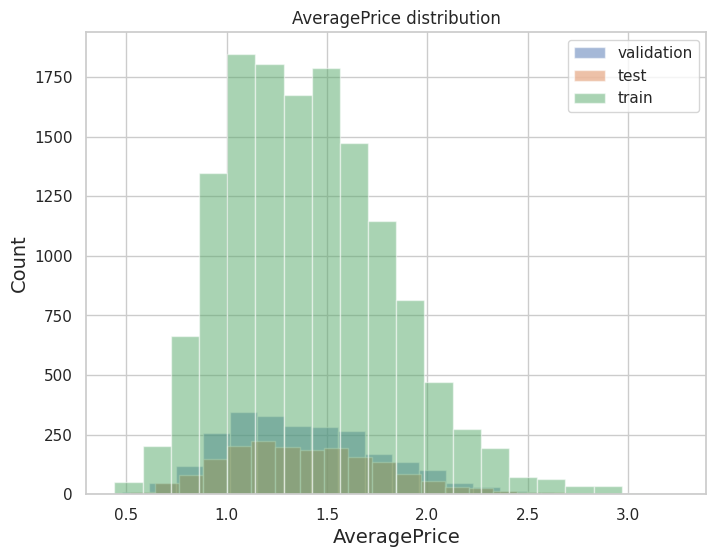

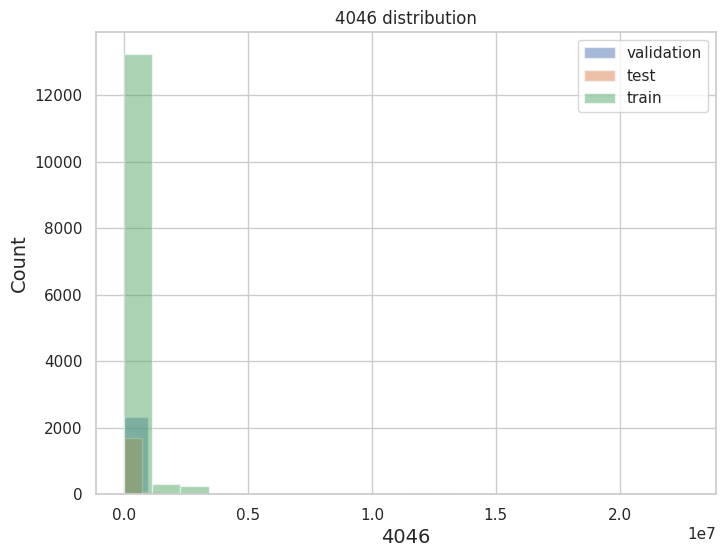

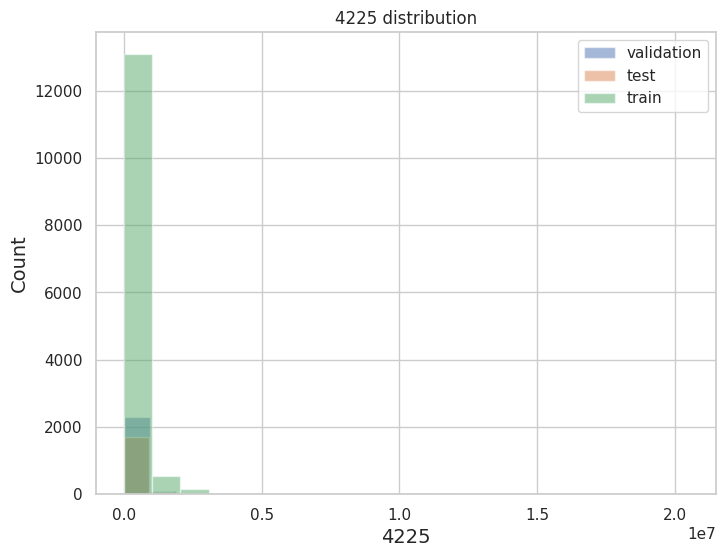

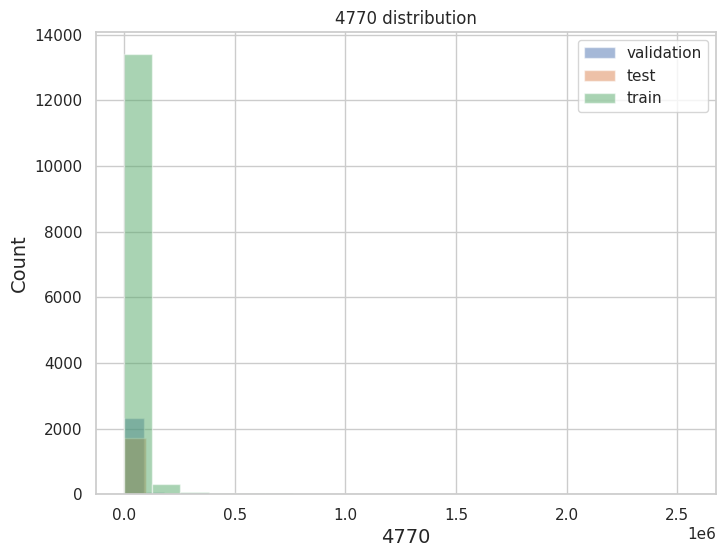

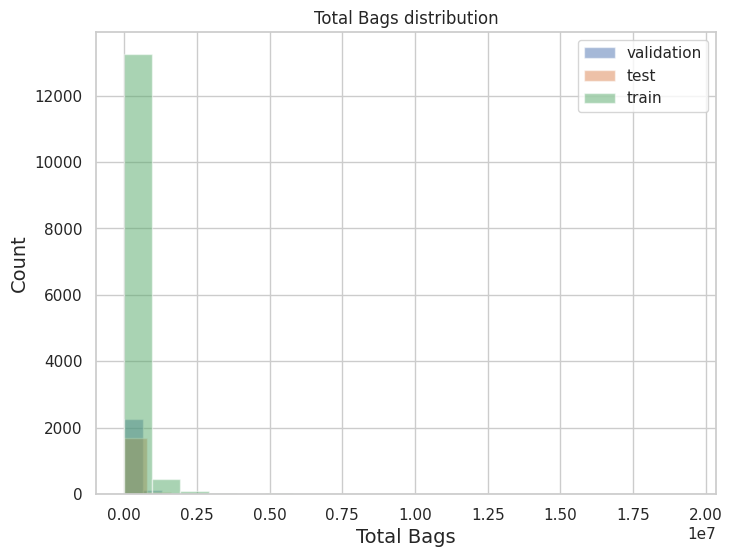

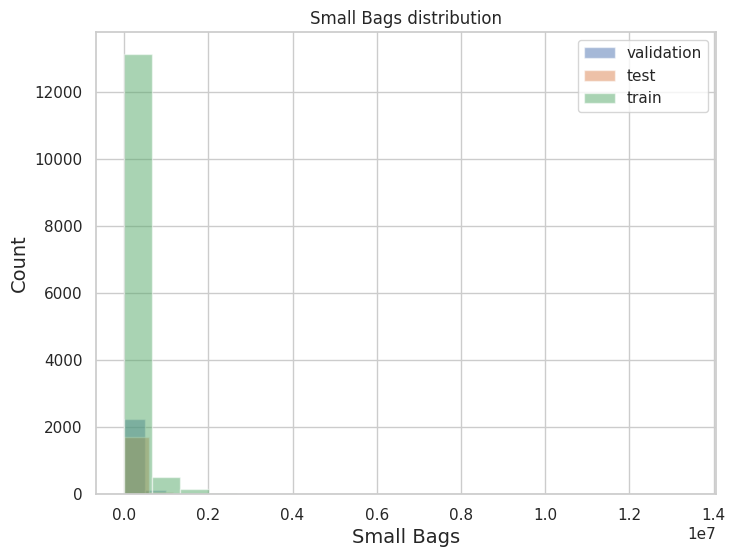

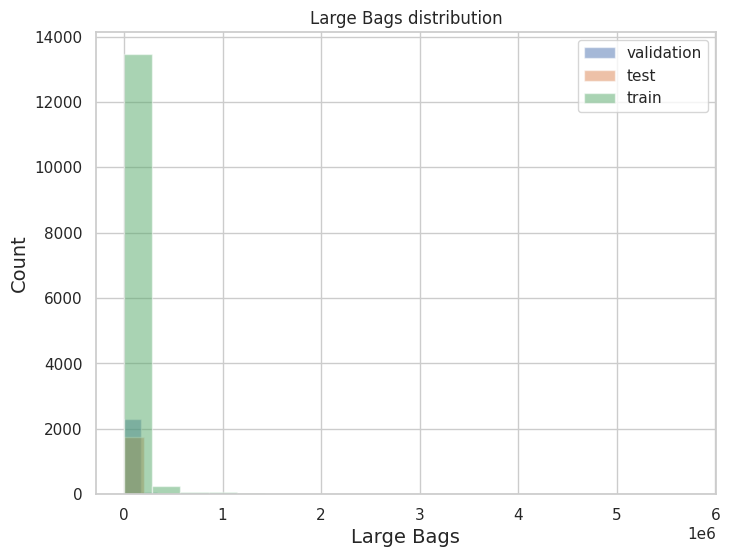

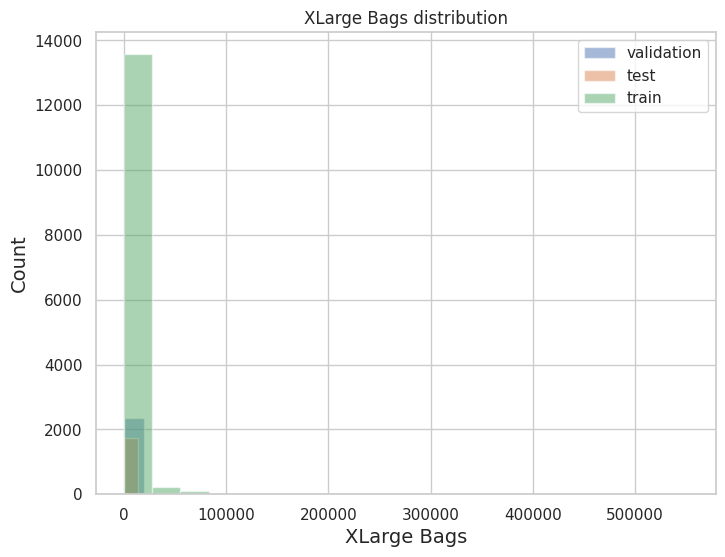

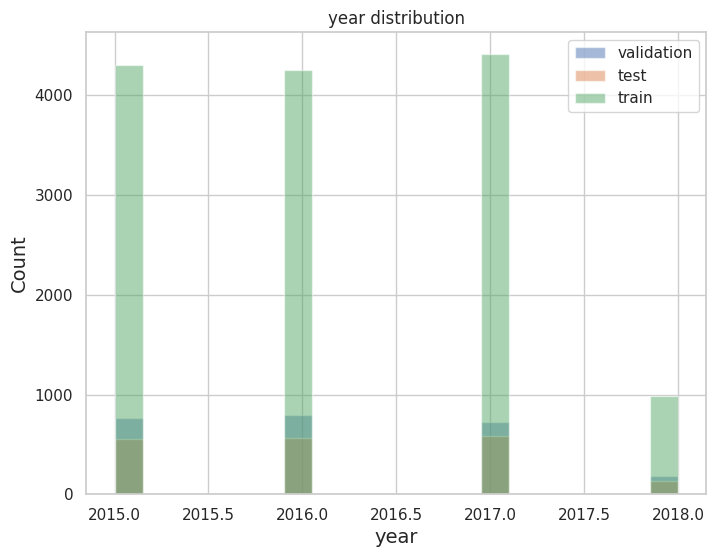

In [160]:
# Plotting the data to see the histogram distribution
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

**Making Predictions**

In [161]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on training set =", r2)

Mean squared error: 3033.87
Coefficient of determination: 1.00
R^2 score on training set = 0.999999999743587


In [162]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 541.54
Coefficient of determination: 1.00
R^2 score on test set = 0.9999999999603968


In [163]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 377.47
Coefficient of determination: 1.00
R^2 score on validation set = 0.999999999966184


## **Auto ML using H2O**

In [164]:
pip install --no-cache-dir flask --user


In [165]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=33c78aff70ed02614c58c670b98e5ada638d964c5d15afb122c5dea8f4602d34
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [166]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML

**Initialising the h2o cluster**

In [167]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpotgw7ur_
  JVM stdout: /tmp/tmpotgw7ur_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpotgw7ur_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_wdut1h
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


We will be using a Kaggle dataset on **Avocado Prices** which has 11 Numerical columns and 3 Categorical columns. The dataset provides information about Avocado Prices with the help of variables such as average price, total avocados sold with different PLU's, etc.

Hence our predictor variable here is the "Total Volume" column.

In [170]:
#reading the dataset
import pandas as pd
pandas_df = pd.read_csv('https://raw.githubusercontent.com/Pritika-24/Combined-Data-Cleaning-Feature-Selection-Modeling-and-Interpretability/main/avocado.csv')

In [171]:
#exploring the dataset columns
pandas_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [172]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [173]:
uniques = pandas_df['region'].unique()
print(uniques)

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [174]:
uniques = pandas_df['type'].unique()
print(uniques)

['conventional' 'organic']


**We will be encoding the "region" and "type" columns for further use, as they can be a factor in determining Average Price.**

In [175]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of columns to label encode
columns_to_encode = ['region', 'type']

# Apply label encoding to each column
for column in columns_to_encode:
    pandas_df[column] = label_encoder.fit_transform(pandas_df[column])

In [176]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int64  
 12  year          18249 non-null  int64  
 13  region        18249 non-null  int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 1.9+ MB


In [177]:
pandas_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [178]:
import numpy as np

#gives us the list of numerical columns and categorical columns
numerical_col = pandas_df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",numerical_col)

categorical_col = pandas_df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",categorical_col)

Numerical columns: 
 Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')
Categorical columns: 
 Index(['Date'], dtype='object')


As we have encoded the "region" and "type" column, we only have one cetgorical column now which is "Date".

Since the "Date" column does not really contribute in determining the Total Volume of the Avocados, we can go ahead and drop that column.

In [179]:
pandas_df = pandas_df.drop(columns=['Date'])

In [180]:
pandas_df = pandas_df.drop(columns=['Unnamed: 0'])

In [181]:
pandas_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [182]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame 'df' with your predictor variables
# Exclude the specific column you want to ignore
exclude_column = 'Unnamed: 0'
predictors = [col for col in pandas_df.columns if col != exclude_column]

# Create a DataFrame containing only the selected predictors
X = pandas_df[predictors]

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Format the VIF values to two decimal points
vif["VIF"] = ["{:.2f}".format(value) for value in vif["VIF"]]

# Print the VIF values
print(vif)

        Variable                 VIF
0   AveragePrice               21.93
1   Total Volume       5212424157.49
2           4046        694698638.40
3           4225        633297244.65
4           4770          4973370.24
5     Total Bags  250199979298360.88
6     Small Bags  142971416741920.50
7     Large Bags   15214863605981.41
8    XLarge Bags      78555723484.57
9           type                3.34
10          year               18.79
11        region                4.16


It's clear that we have a multicollinearity issue in the dataset. Multicollinearity occurs when predictor variables in a regression model are highly correlated with each other, and it can lead to unstable and unreliable coefficient estimates in regression analysis.

**Here are some observations from the VIF values:**

1.   Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, and Large Bags all
have extremely high VIF values. This indicates strong multicollinearity among these variables. In particular, Total Bags and Small Bags have extremely high VIF values, suggesting that they are highly correlated with many other variables in the dataset.

2.  *AveragePrice and year have relatively high VIF values as well, although not as extreme as some of the other variables.

3. *XLarge Bags has a VIF value that's still relatively high, but lower than some of the other variables.

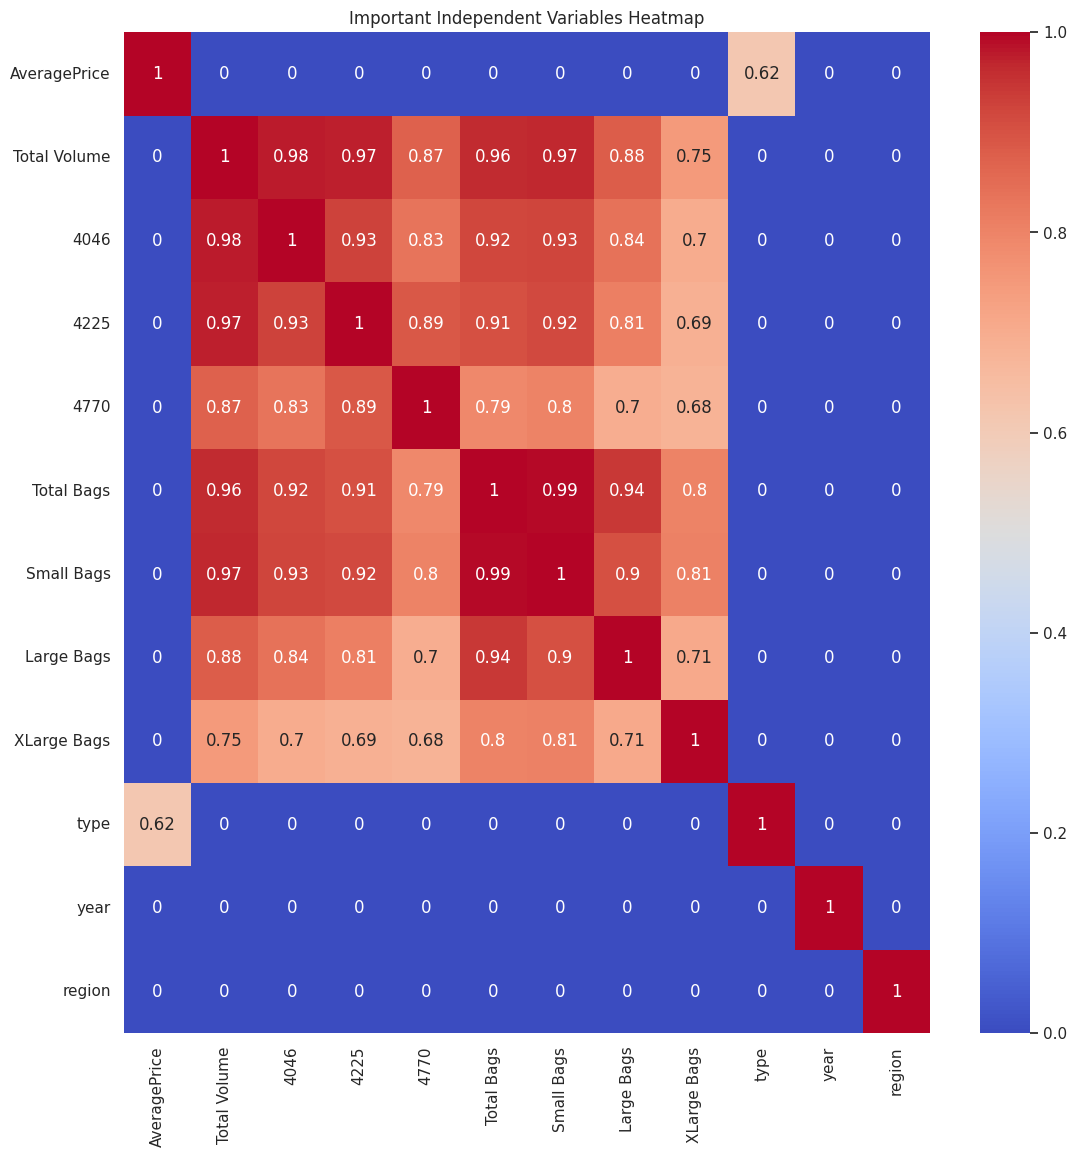

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = pandas_df.corr()

# Setting a threshold for correlation strength
correlation_threshold = 0.5

# Filtering out the important independent variables
important_variables = correlation_matrix[abs(correlation_matrix) >= correlation_threshold].fillna(0)

# Creating a heatmap to visualize the relationships
plt.figure(figsize=(13, 13))
sns.heatmap(important_variables, annot=True, cmap='coolwarm')
plt.title('Important Independent Variables Heatmap')
plt.show()

As we can from the heatmap above, most of the Features are  correleted with the Total Volume column.

The correlation close to 1 indicates that it is strongly correlated, and the values closer to 0 are a weak correlation.


## **Execution of H2O**

In [184]:
df = h2o.H2OFrame(pandas_df)  # Converted Dataframe to H2O data frame to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [185]:
df

AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1.33,64236.6,1036.74,54454.8,48.16,8696.87,8603.62,93.25,0,0,2015,0
1.35,54877,674.28,44638.8,58.33,9505.56,9408.07,97.49,0,0,2015,0
0.93,118220,794.7,109150,130.5,8145.35,8042.21,103.14,0,0,2015,0
1.08,78992.1,1132,71976.4,72.58,5811.16,5677.4,133.76,0,0,2015,0
1.28,51039.6,941.48,43838.4,75.78,6183.95,5986.26,197.69,0,0,2015,0
1.26,55979.8,1184.27,48068,43.61,6683.91,6556.47,127.44,0,0,2015,0
0.99,83453.8,1368.92,73672.7,93.26,8318.86,8196.81,122.05,0,0,2015,0
0.98,109428,703.75,101815,80,6829.22,6266.85,562.37,0,0,2015,0
1.02,99811.4,1022.15,87315.6,85.34,11388.4,11104.5,283.83,0,0,2015,0
1.07,74338.8,842.4,64757.4,113,8625.92,8061.47,564.45,0,0,2015,0


H2O provides a sample dataset of 10 rows with summary statistics for numerical columns.

The following chunk gives the information about the dataset concerning the following:

- **type:** This indicates the data type of the column.

- **mean:** This is the average value (mean) for each numerical column.

- **maxs:** This indicates the maximum value for each numerical column. It represents the largest value present in that column.

- **sigma:** Sigma measures the degree of variation in data points for each numerical column. A higher standard deviation indicates greater dispersion from the mean.

- **zeros:** This is the count of zero values in each numerical column.

- **missing_mean:** This statistic provides the mean of non-missing values in numerical columns with missing or NA entries.

In [186]:
df.describe(chunk_summary=True)

Rows:18249
Cols:12

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size      size_percentage
------------  -------------------------  -------  ------------------  --------  -----------------
CBS           Binary                     1        8.33333             2.3 KB    0.320784
C1N           1-Byte Integers (w/o NAs)  1        8.33333             17.9 KB   2.49821
C1S           1-Byte Fractions           1        8.33333             17.9 KB   2.5004
C2S           2-Byte Fractions           1        8.33333             35.7 KB   4.98933
C4S           4-Byte Fractions           7        58.3333             499.6 KB  69.7705
C8D           64-bit Reals               1        8.33333             142.6 KB  19.9208

Frame distribution summary: 
                 size      number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  --------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  716.0 KB  18249             1                              12
mean             716.0 KB  18249             1                              12
min              716.0 KB  18249             1                              12
max              716.0 KB  18249             1                              12
stddev           0  B      0                 0                              0
total            716.0 KB  18249             1                              12

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
type,real,real,real,real,real,real,real,real,real,int,int,int
mins,0.44,84.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0,0.0
mean,1.4059784097758745,850644.0130089371,293008.42453065893,295154.56835607614,22839.73599265713,239639.20205983927,182194.68669571093,54338.08814455601,3106.4265072058874,0.49991780371527206,2016.1478985149838,26.495643596909304
maxs,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.8,5719096.61,551693.65,1.0,2018.0,53.0
sigma,0.4026765554955525,3453545.3553994684,1264989.0817627835,1204120.4011350533,107464.06843537069,986242.3992164108,746178.5149617895,243965.96454740898,17692.89465191642,0.5000136931874184,0.9399384671420302,15.583787874697258
zeros,0,0,242,61,5497,15,159,2370,12048,9126,0,338
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015.0,0.0
2,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,0.0,2015.0,0.0


**Splitting the Dataset**

In [187]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

**Training the AutoML model**

Below:

- **max_model:** It specifies the maximum number of individual models that AutoML will train during the search for the best model.
- **balance_classes:** When set to TRUE, AutoML adjusts the class distribution in the training data to be balanced.
- **seed:** The seed parameter allows you to set a random seed for reproducibility.

In [189]:
auto_ml = H2OAutoML(max_models =5, balance_classes=True, seed =1)

**Now we start the training process by specifying:**

- **training_frame:** The training_frame parameter is used to specify the H2O data frame that contains your training dataset.
- **y:** The y parameter specifies the response variable for ML model prediction. "Average Price" according to our dataset

**Understanding the Parameters after the training process:**

- **Mean Squared Error (MSE):** The Mean Squared Error (MSE) measures the average of the squared differences between predicted and actual values.

- **Root Mean Squared Error (RMSE):** The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models as it's a measure of how well the model can predict the actual values.

- **Mean Absolute Error (MAE):** The MAE is the average absolute difference between predicted and actual values, calculated by taking the average of their absolute differences.

- **Root Mean Squared Logarithmic Error (RMSLE):** RMSLE is a variation of RMSE used in regression models with a wide range of values. It calculates the square root of the average squared difference between the logarithms of predicted and actual values.

- **Mean Residual Deviance:** The Mean Residual Deviance measures the average difference between predicted and actual values, normalized by the degrees of freedom.

- **R-squared (R^2):** The R-squared is a statistical measure that indicates how well a model fits the data. It quantifies the proportion of the variance in the dependent variable that can be explained by the independent variables. 1 means the model accounts for all variability, and 0 means it does not account for any.

- **Null Degrees of Freedom:** The Null Degrees of Freedom equals the number of observations minus 1. It represents independent observations in the dataset based on the number of parameters in the model.

- **Residual Degrees of Freedom:** The Residual Degrees of Freedom in statistical modeling is the number of independent observations in the dataset that can vary after adjusting for the number of parameters involved in the model.

- **Null Deviance:** The Null Deviance is the deviance of the null model with no independent variables, representing the unexplained variance in the dependent variable.

- **Residual Deviance:** The Residual Deviance is the deviance of the model after accounting for the independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

- **Akaike Information Criterion (AIC):** The AIC measures a model's quality, factoring in its complexity. It's calculated by subtracting the logarithm of the model's likelihood from twice the number of parameters. Lower values indicate better quality.

In [190]:
auto_ml.train(training_frame = train, y = 'Total Volume')

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/5
# GBM base models (used / total),0/1
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


From the statistics above for the train and cross-validation data we can infer that:

**Train Data**

- The **MSE (Mean Squared Error)** of **1,879,580,915.19** shows there's a significant squared difference between the model's predicted values and the actual values for the training data, indicating possible outliers or scale issues.
- An **RMSE (Root Mean Squared Error)** of **43,354.13** suggests that, on average, the model’s predictions deviate from the actual values by a large margin on the training set.
- With an **MAE (Mean Absolute Error)** of approximately **12,305.44**, this reflects the average absolute difference between predicted and actual values, which is high but might be expected given the scale of the 'Total Volume' variable.
- The absence of an **RMSLE (Root Mean Squared Logarithmic Error)** implies that it wasn't calculated, possibly due to negative or zero values in the 'Total Volume' which cannot be log-transformed.
- The **R^2 (R-squared)** value of approximately **0.9998** indicates that the model can explain nearly all the variability of the response data around its mean. While impressive, it also raises concerns of overfitting.
- The large gap between **null deviance** and **residual deviance** indicates the model's success in capturing the variance as compared to a mean model. However, the absolute numbers are vast due to the scale of 'Total Volume'.
- An **AIC (Akaike Information Criterion)** of **242,923.80** is difficult to interpret without context but suggests a complex model with potentially too many parameters, which could again imply overfitting.

**Cross-Validation Data**

- The increased **MSE** of **34,652,761,048.63** on the cross-validation data set indicates the model does not perform as well on unseen data, suggesting a discrepancy in the model's ability to generalize.
- A **RMSE** of **186,152.52** on the cross-validation data set is significantly higher than the training data, reinforcing the idea that the model's performance drops on new data.
- The **MAE** of **27,622.06** is also higher in the cross-validation than in the training, pointing towards less accurate predictions for data not encountered during training.
- The **RMSLE** is not reported; similar reasons as for the training data could apply.
- An **R-squared** value of approximately **0.9969** on cross-validation is still quite high, which means the model is explaining a lot of the variance in the unseen data. However, the drop from the training R-squared suggests performance degradation on new data.
- The larger **residual deviance** seen in cross-validation as compared to training indicates that the model is less capable of explaining variance outside the training set.
- A higher **AIC** value on cross-validation data (approximately **397,771.08**) compared to training data suggests that when adjusted for the number of parameters and complexity, the model might not be as effective for cross-validation data.


### Assessment

After training is complete, the effectiveness of each model can be assessed through a ranking table created by H2O AutoML. This table orders the models according to their proficiency, measured by a chosen metric. Typically, for classification tasks, the models are arranged from the lowest to highest log loss, while for regression tasks, they are sorted by their RMSE, with the most accurate models appearing first.

In [191]:
lb = auto_ml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231212_22110,186153,3.46528e+10,27622.1,nan,3.46528e+10
StackedEnsemble_BestOfFamily_1_AutoML_1_20231212_22110,203382,4.13642e+10,31728.1,nan,4.13642e+10
XGBoost_2_AutoML_1_20231212_22110,207173,4.29208e+10,35058.5,nan,4.29208e+10
XGBoost_1_AutoML_1_20231212_22110,215897,4.66117e+10,34092.8,0.102957,4.66117e+10
DRF_1_AutoML_1_20231212_22110,235808,5.56055e+10,31633.8,0.128691,5.56055e+10
GBM_1_AutoML_1_20231212_22110,478844,2.29291e+11,61239.2,nan,2.29291e+11
GLM_1_AutoML_1_20231212_22110,3.36306e+06,1.13102e+13,1.15358e+06,3.26271,1.13102e+13


**Finding the best model**

In [192]:
best_model = auto_ml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20231212_22110


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/5
# GBM base models (used / total)      0/1
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1879580915.188015
RMSE: 43354.13377277898
MAE: 12305.443861984715
RMSLE: NaN
Mean Residual Deviance: 1879580915.188015
R^2: 0.9998344741602938
Null degrees of freedom: 10040
Residual degrees of freed

This particular model boasts the **most favorable RMSE**, a common gauge for assessing the accuracy of predictions in regression analyses. Nevertheless, to ensure a comprehensive evaluation of its predictive capabilities, it is essential to consider additional performance metrics and employ cross-validation techniques to more reliably predict how the model will perform with new data.

In [193]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 23779645670.004044
RMSE: 154206.5033323953
MAE: 26836.56168594133
RMSLE: NaN
Mean Residual Deviance: 23779645670.004044
R^2: 0.9983541681835152
Null degrees of freedom: 3574
Residual degrees of freedom: 3571
Null deviance: 5.168631091474237e+16
Residual deviance: 85012233270264.45
AIC: 95569.6530966618

 Each metric offers insight into different aspects of the model's predictive performance:

Certainly, I will provide an adjusted summary based on the new values you have provided for your model's performance:

Each metric offers insight into different aspects of the model's predictive performance:

- **MSE (Mean Squared Error):** At 23,779,645,670.004044, this value indicates that the average of the squares of the errors is quite high. This suggests that there are significant differences between the predicted and actual values.

- **RMSE (Root Mean Squared Error):** The RMSE value of 154,206.5033323953 is the square root of the MSE. It brings the error metric back to the same scale as the target variable, making it more interpretable. However, the value is quite large, which suggests that the model's predictions can be off by a substantial amount on average.

- **MAE (Mean Absolute Error):** With a MAE of 26,836.56168594133, this metric shows the average absolute difference between the predicted and actual values. This relatively high MAE indicates that the model’s average predictive accuracy may not be very precise.

- **RMSLE (Root Mean Squared Logarithmic Error):** The RMSLE is not available (NaN), which might indicate the presence of negative predictions or actual values, as logarithms of such numbers are undefined.

- **Mean Residual Deviance:** This is the same as the MSE and is equally high at 23,779,645,670.004044, suggesting that on average, the residuals have a high variance.

- **R^2 (R-squared or Coefficient of Determination):** An R-squared value of 0.9983541681835152 indicates that approximately 99.84% of the variance in the dependent variable is predictable from the independent variables. Despite the high MSE and MAE, this suggests the model fits the data very closely in terms of the proportion of explained variance.

- **Null Deviance and Residual Deviance:** The considerable reduction from null deviance (approximately 5.17e+16) to residual deviance (85,012,233,270,264.45) indicates that the model is a significantly better fit than a simple mean model. This shows that, despite the high absolute error metrics, the model has improved the predictability from a null model.

- **AIC (Akaike Information Criterion):** The AIC value of 95,569.6530966618 suggests the model is complex. In contrast to the previous example, the positive value here does not directly imply a better or worse fit but should be used to compare to alternative models on the same data.

In summary, the metrics collectively indicate that while the model has a high R-squared value, suggesting a strong fit, the large values for MSE, RMSE, and MAE highlight that the model's predictions can be off by a significant amount on individual predictions. The absence of RMSLE prevents assessment of the model's performance on a logarithmic scale. The large scale of the target variable may be influencing the high error values, so it's important to consider these metrics in context. The model shows a marked improvement over a naive mean model but may benefit from further tuning to reduce prediction errors.

### **H2O AutoML Model Analysis**

In [201]:
#assign index values to all the models generated
model_index = 0
glm_index = 0
glm_model = ""
auto_ml_leaderboard_df = auto_ml.leaderboard.as_data_frame()
models_dict = {}
for m in auto_ml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in auto_ml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_AllModels_1_AutoML_1_20231212_22110': 0,
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20231212_22110': 1,
 'XGBoost_2_AutoML_1_20231212_22110': 2,
 'GLM_1_AutoML_1_20231212_22110': 6}

In [203]:
#to display the best model
best_model.algo

'stackedensemble'

In [196]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


<ipython-input-196-a0f01d27643e>:8: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

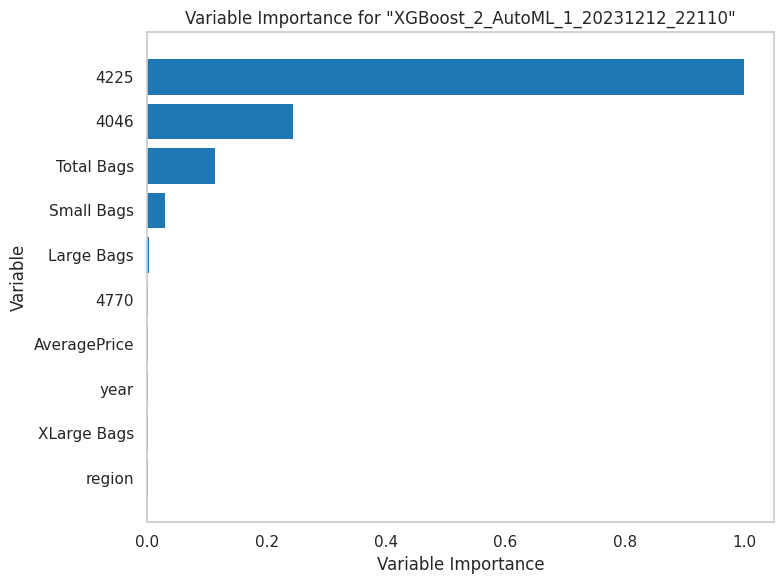

In [198]:
#Variable importance
explain_model = auto_ml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])

The above graph is a variable Importance Graph on the H20's Distributed Random Forest Model

We can Interpret that

"4225" is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%)

"4046" is 0.22 (being the second most important variable)

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

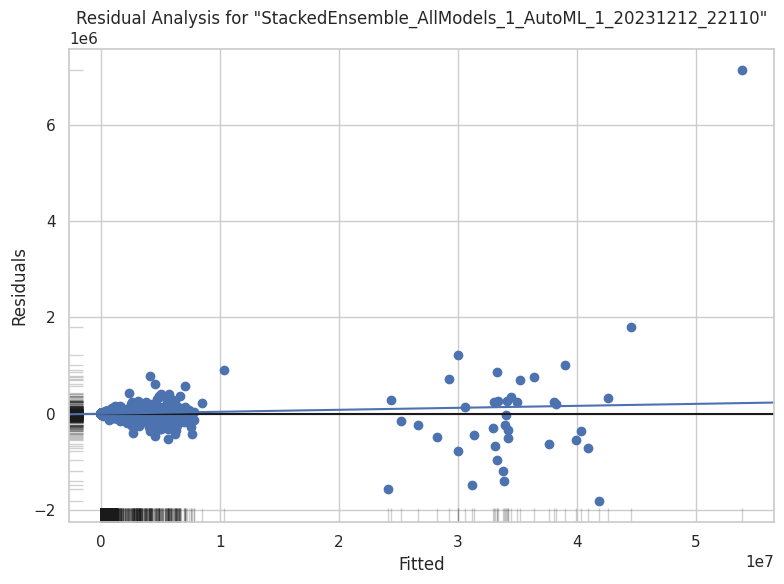

In [204]:
#Residual Analysis
explain_model = auto_ml.explain(frame = test, figsize = (8,6),include_explanations=['residual_analysis'])

The presence of a **dispersed array of points around the zero line** suggests that the **model is performing well**.

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-205-cb813f47c4df>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


6
Model Name: GLM_1_AutoML_1_20231212_22110


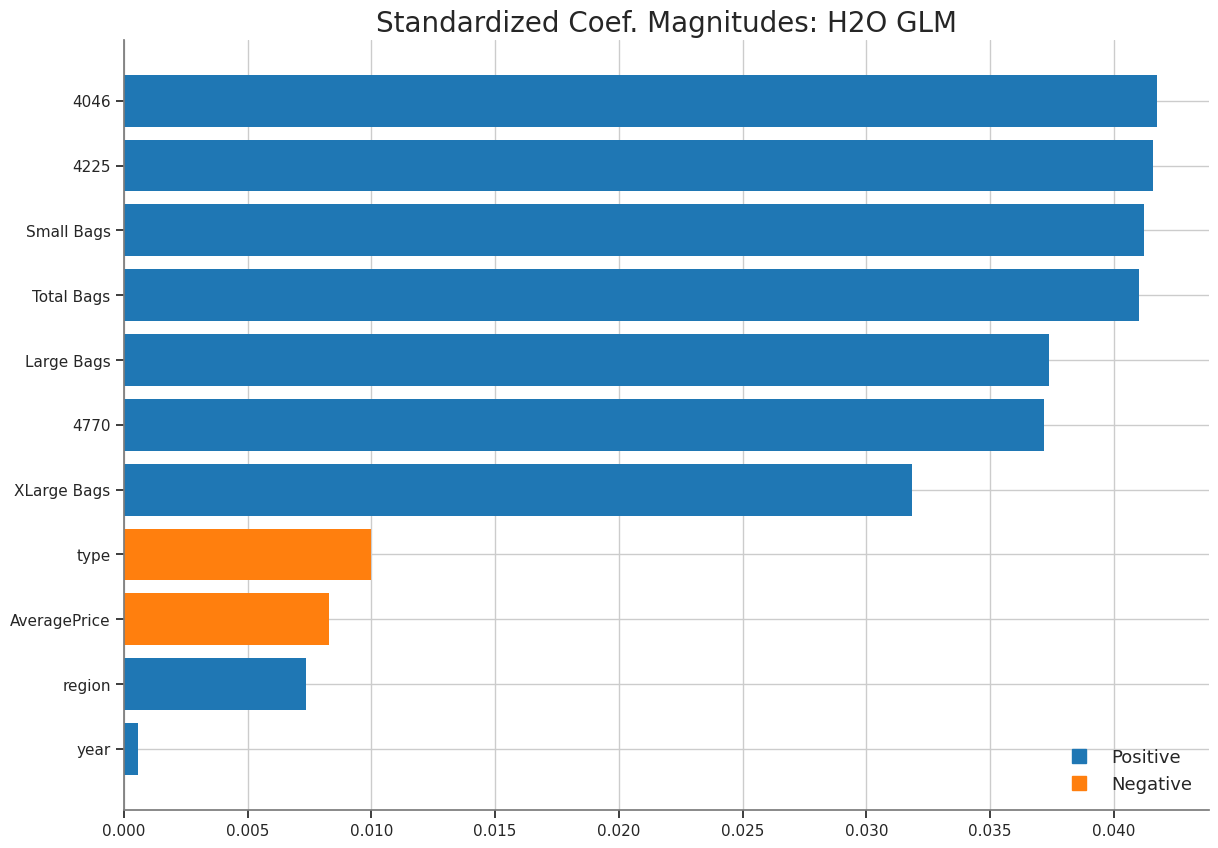

In [205]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(auto_ml.leaderboard[glm_index, "model_id"])
    print("Model Name:", glm_model.model_id)
    glm_model.std_coef_plot()


The magnitudes of standardized coefficients reflect the comparative significance of each predictor within the model, adjusted for the scale of the respective variable.

A greater magnitude value for "4046" signifies a more pronounced influence on the dependent variable, which is, "Total Volume".

###**Regularisation**

In [206]:
#genereating models with and without regularisation

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
df_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
df_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [207]:
# Generating models without regularisation

train = train.drop("XLarge Bags", axis=1)
df_glm.train(y = 'Total Volume', training_frame = train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1702346462675_8


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              10                            10                             1                       py_21_sid_a419

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 2818.093145873845
RMSE: 53.085715083003684
MAE: 5.888691363693563
RMSLE: 0.0010038095168622102
Mean Residual Deviance: 2818.093145873845
R^2: 0.9999999997508328
Null degrees of freedom: 14673
Residual degrees of freedom: 14663
Null deviance: 1.659636529752867e+17
Residual deviance: 41352698.8225528
AIC: 158234.56032645612

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  -----------------  ------------------
    2023-12-12 02:51:27  0.000 sec   0             1.6596365424188333e+17     11310048673973.24
    2023-12-12 02:51:27  0.101 sec   1                                                           53.085715083003684  2818.093145873845    5.888691363693563  0.9999999997508328

Variable Importances: 
variable      relative_importance    scaled_importance    percentage
------------  ---------------------  -------------------  ------------
4046          1.23637e+06            1                    0.355678
4225          1.17782e+06            0.952645             0.338835
Total Bags    957433                 0.774392             0.275435
4770          104218                 0.0842937            0.0299814
Small Bags    184.044                0.000148858          5.29457e-05
Large Bags    54.3266                4.39405e-05          1.56287e-05
type          2.51776                2.03642e-06          7.2431e-07
year          2.40096                1.94195e-06          6.9071e-07
region        0.713734               5.77283e-07          2.05327e-07
AveragePrice  0.513982               4.15719e-07          1.47862e-07

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [208]:
#genereating models with regularisation

df_glm_regularization.train(y = 'Total Volume', training_frame = train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1702346462675_9


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  10                            10                             1                       py_21_sid_a419

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 37888396.80612817
RMSE: 6155.355132413415
MAE: 2146.0432225671057
RMSLE: 0.06551265033194424
Mean Residual Deviance: 37888396.80612817
R^2: 0.9999966500235156
Null degrees of freedom: 14673
Residual degrees of freedom: 14663
Null deviance: 1.659636529752867e+17
Residual deviance: 555974334733.1248
AIC: 297730.5894437564

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  ------------------  ------------------
    2023-12-12 02:54:07  0.000 sec   0             1.6596365424188333e+17     11310048673973.24
    2023-12-12 02:54:07  0.034 sec   1                                                           6155.355132413415  37888396.80612817    2146.0432225671057  0.9999966500235156

Variable Importances: 
variable      relative_importance    scaled_importance    percentage
------------  ---------------------  -------------------  ------------
4046          1.22879e+06            1                    0.352342
4225          1.16563e+06            0.948601             0.334232
Small Bags    435115                 0.354102             0.124765
Total Bags    405310                 0.329846             0.116219
Large Bags    138637                 0.112824             0.0397528
4770          112772                 0.0917753            0.0323363
type          582.536                0.000474075          0.000167036
AveragePrice  332.612                0.000270684          9.53732e-05
year          233.157                0.000189746          6.68556e-05
region        83.7186                6.81312e-05          2.40055e-05

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

**Observing the metrics:**

The MSE saw a significant jump from 2,818.09 to 37,888,396.81. Concurrently, the RMSE skyrocketed from 53.09 to 6,155.36. Most other metrics also show substantial differences. Specifically, the Residual deviance swelled from 41,352,698.82 to 555,974,334,733.12, and the AIC increased from 158,234.56 to 297,730.59.

Given these changes, it's evident that the regularization has adversely affected the model's performance for this specific dataset.

**Which hyperparameters are important?**

For finding the best set of hyperparameters and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used.

It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [209]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [210]:
hyper_params = {
    "learn_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "sample_rate": [0.8, 0.9, 1.0],
    "col_sample_rate": [0.8, 0.9, 1.0]
}
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1 }


In [212]:

gbm_grid = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=hyper_params,
    search_criteria=search_criteria,
)
gbm_grid.train(
    x=[
        'AveragePrice', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'type', 'year',
       'region'
    ],
    y='Total Volume',
    training_frame=train,
    ntrees=100,
    seed=1
)


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.8,0.1,7.0,1.0,gbm_grid2_model_19,9080270973.6213074
,0.9,0.1,7.0,0.9,gbm_grid2_model_25,10231911167.8091793
,0.8,0.1,7.0,0.8,gbm_grid2_model_35,10550703999.9412231
,1.0,0.1,7.0,0.8,gbm_grid2_model_26,10867124782.3975811
,1.0,0.1,5.0,1.0,gbm_grid2_model_6,11030384726.7038231
,0.8,0.1,5.0,0.9,gbm_grid2_model_7,11924640584.4517727
,1.0,0.1,5.0,0.9,gbm_grid2_model_15,11932382759.8452225
,0.9,0.1,5.0,0.8,gbm_grid2_model_10,12193009710.7253437
,1.0,0.05,7.0,1.0,gbm_grid2_model_13,14822295831.8606148
,0.9,0.05,7.0,0.9,gbm_grid2_model_30,15875396067.1043530


In [213]:
parameterGrid = gbm_grid.get_grid(sort_by="rmse", decreasing=False)

In [214]:
list_hyperparameters = []
for i in range(36):
    list_hyperparameters.append(parameterGrid.get_hyperparams_dict(i))

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [215]:
models = parameterGrid.models


In [216]:
list_rmse = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(train)
    rmse = performance_metrics.rmse()
    list_rmse.append(rmse)

In [217]:
for i in range(36):
    list_hyperparameters[i]["rmse"] = list_rmse[i]

In [218]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)
hyperparameters_dataframe

,col_sample_rate,learn_rate,max_depth,sample_rate,rmse
0,0.8,0.10,7,1.0,9.529056e+04
1,0.9,0.10,7,0.9,1.011529e+05
2,0.8,0.10,7,0.8,1.027166e+05
3,1.0,0.10,7,0.8,1.042455e+05
4,1.0,0.10,5,1.0,1.050256e+05
5,0.8,0.10,5,0.9,1.092001e+05
6,1.0,0.10,5,0.9,1.092354e+05
7,0.9,0.10,5,0.8,1.104219e+05
8,1.0,0.05,7,1.0,1.217469e+05
9,0.9,0.05,7,0.9,1.259976e+05


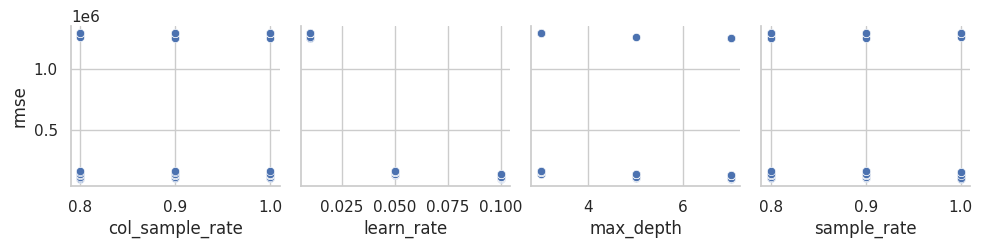

In [219]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["rmse"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

Given above is a pair plot of the different parameters concerning their RMSE values.

These four parameters **col_sample_rate, learn_rate, max_depth**, and **sample_rate** can be considered important parameters.

##**Modeling and Interpretability**

In [220]:
!pip install xgboost

In [221]:
# for outlier preprocessing
!pip install datasist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.8 MB/s eta 0:00:00


In [250]:
!pip install shap

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import shap
from sklearn.model_selection import  train_test_split

In [230]:
#reading the dataset
import pandas as pd
pandas_df = pd.read_csv('https://raw.githubusercontent.com/Pritika-24/Combined-Data-Cleaning-Feature-Selection-Modeling-and-Interpretability/main/avocado.csv')

In [231]:
#exploring the dataset columns
pandas_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [232]:
#checking if the any data is missing
pandas_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [233]:
pandas_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


We will be using a Kaggle dataset on Avocado Prices which has 11 Numerical columns and 3 Categorical columns. The dataset provides information about Avocado Prices with the help of variables such as total volume, total avocados sold with different PLU's, etc.

Hence our predictor variable here is the "Total Volume" column.

In [234]:
#exploring the dataset columns
pandas_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


**I will be encoding the three categorical features of the dataset, "Date", "type" & "region".**

In [237]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of columns to label encode
columns_to_encode = ['Date', 'type', 'region']

# Apply label encoding to each column
for column in columns_to_encode:
    pandas_df[column] = label_encoder.fit_transform(pandas_df[column])

In [238]:
#dropping unnecessary columns
pandas_df = pandas_df.drop(columns=['Unnamed: 0'])

In [239]:
#dropping unnecessary columns
pandas_df = pandas_df.drop(columns=['Date'])

In [240]:
#exploring the dataset columns
pandas_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


**Check the number of outliers**

In [241]:
from datasist.structdata import detect_outliers


numeric_columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'XLarge Bags', 'year']
index = detect_outliers(pandas_df, 0, numeric_columns)
len(index)

6306

**Delete outliers and imputate using median**

In [242]:
for col in pandas_df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'XLarge Bags', 'year']]:
    outliers_indices = detect_outliers(pandas_df, 0, [col])
    col_median = pandas_df[col].median()
    pandas_df[col].iloc[outliers_indices] = col_median

<ipython-input-242-b20ac08a1b63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandas_df[col].iloc[outliers_indices] = col_median
<ipython-input-242-b20ac08a1b63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandas_df[col].iloc[outliers_indices] = col_median
<ipython-input-242-b20ac08a1b63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandas_df[col].iloc[outliers_indices] = col_median
<ipython-input-242-b20ac08a1b63>:4: Sett

([<matplotlib.axis.XTick at 0x78ce8ceab550>,
 [Text(0, 0, 'AveragePrice'),
  Text(1, 0, 'Total Volume'),
  Text(2, 0, '4046'),
  Text(3, 0, '4225'),
  Text(4, 0, '4770'),
  Text(5, 0, 'Total Bags'),
  Text(6, 0, 'Small Bags'),
  Text(7, 0, 'XLarge Bags'),
  Text(8, 0, 'year')])

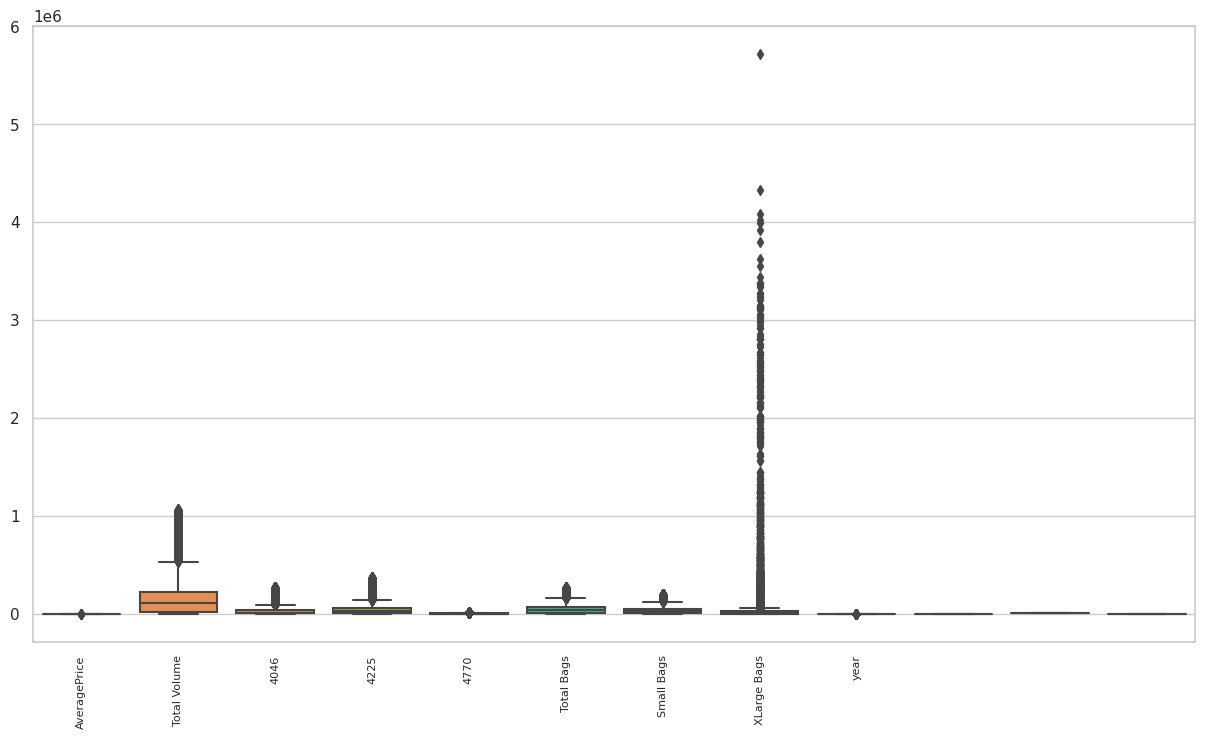

In [243]:
plt.figure(figsize=[15,8])
sns.boxplot(data=pandas_df)

labels = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'XLarge Bags', 'year']
plt.xticks(range(len(labels)), labels, rotation=90, fontsize=8)

###**For further analysis, I will use the Linear Regression, Random Forest Regressor, and AutoML for generating models and run SHAP analysis on those models, for a better visualization.**

###**Linear Regression Model**

In [244]:
X = pandas_df[ ['AveragePrice', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'XLarge Bags', 'year']]

y = pandas_df['Total Volume']

#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [245]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [246]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 21401229538.46
Coefficient of determination: 0.62
R^2 score on test set = 0.6156771791804767


In [247]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Total Volume   R-squared (uncentered):                   0.758
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              6414.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                        03:36:27   Log-Likelihood:                     -2.1762e+05
No. Observations:               16424   AIC:                                  4.353e+05
Df Residuals:                   16416   BIC:                                  4.353e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
AveragePrice  -3.13e+04   3213.457     -9.741      0.000   -3.76e+04    -2.5e+04
4046             0.8939      0.022     39.994      0.000       0.850       0.938
4225             0.7124      0.017     42.357      0.000       0.679       0.745
4770             2.2822      0.371      6.147      0.000       1.554       3.010
Total Bags       0.9947      0.037     26.865      0.000       0.922       1.067
Small Bags       1.3404      0.049     27.588      0.000       1.245       1.436
XLarge Bags    157.8184     26.527      5.949      0.000     105.822     209.815
year            24.1299      2.586      9.330      0.000      19.061      29.199
==============================================================================
Omnibus:                     7995.800   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69935.097
Skew:                           2.159   Prob(JB):                         0.00
Kurtosis:                      12.140   Cond. No.                     3.70e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All the features have a p-value of 0.000,  and hence all of them are significant. The coefficient of Average Price is negative which means it has a negative relationship with Total Volume, and all other coefficients are positive so their relationship with Total Volume is positive.

###**SHAP Analysis for the Linear Regression Model**

In [252]:
!pip install shap
import shap
shap.initjs()

In [253]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

ExactExplainer explainer: 1826it [00:11, 41.34it/s]                           


From the plot below, it is known that **"Small Bags"** is the most effective feature in the Linear Regression model, followed by **"Total Bags"**

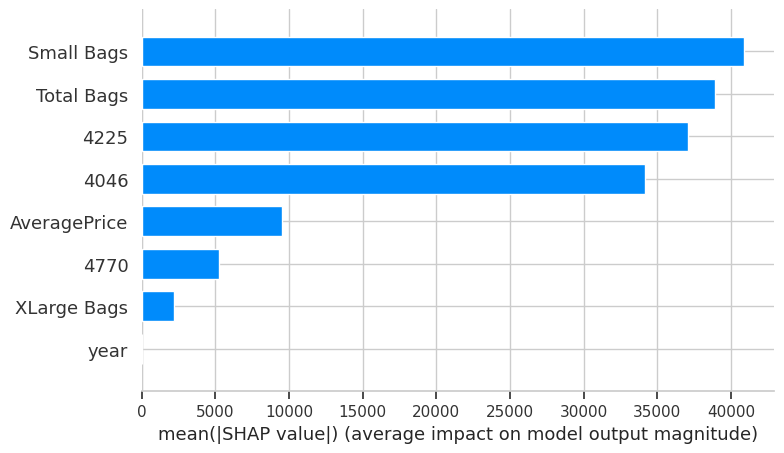

In [254]:
# shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_test, plot_type="bar")

**From the SHAP summary plot below, the following inferences can be made:**

1. 'Small Bags' appear to be the feature with the most substantial impact on the model's output, contributing to an increase in the predicted value when the feature value is high.

2. 'Total Bags' and the feature represented by '4225' also have a significant influence, behaving similarly to 'Small Bags' in terms of driving the model's predictions upwards.

3. 'AveragePrice' shows a mix of positive and negative effects on the prediction. When its value is lower than average, it tends to increase the predicted outcome, whereas higher values decrease the predicted outcome.

4. 'XLarge Bags' and 'year' seem to have a lesser and more uniform impact, with 'year' having a negligible effect compared to other features, suggesting it may be less critical in this model's predictions.

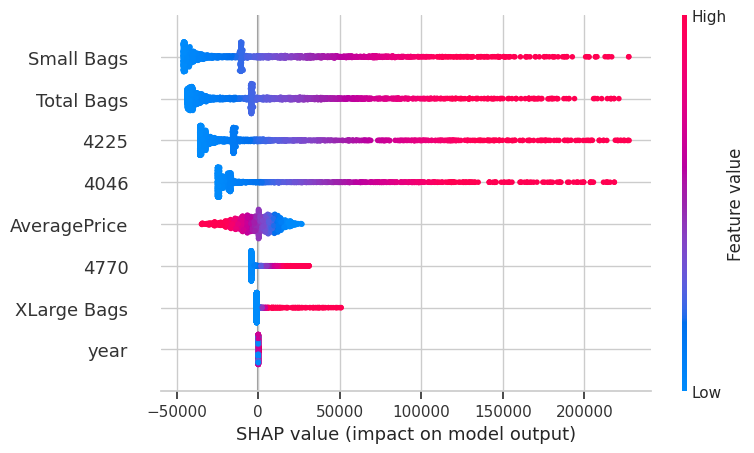

In [255]:
shap.summary_plot(shap_values, X_test)

###**Waterfall Plot**

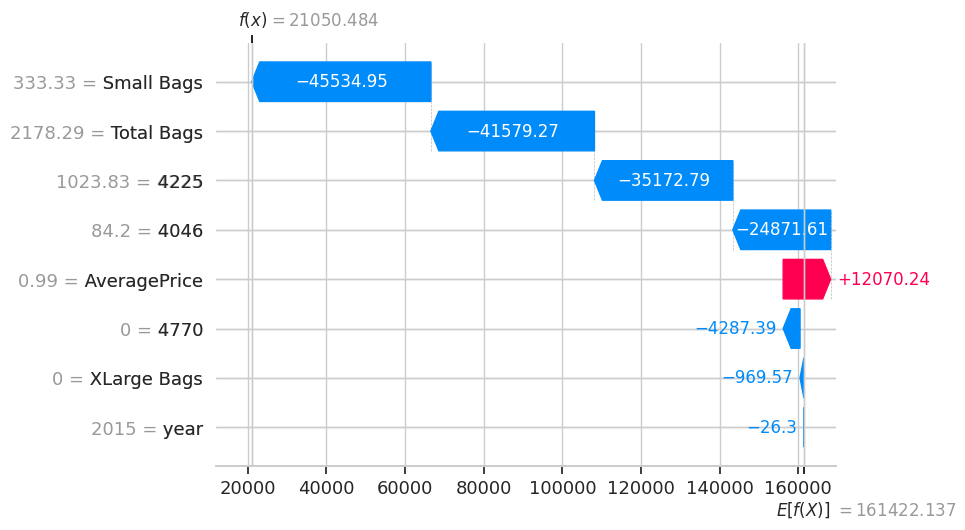

In [256]:
idx = 18
shap.plots.waterfall(shap_values[idx], max_display=14)

The red color means a higher value of a feature. Blue means the lower value of a feature. The base value here is given as 161422.137, which is the average predicted value of the Total Volume of Avocados sold.

"Small Bags", "Total Bags", "4225", "4046" impact the model predictability negatively or the feature/variable which is "Total Volume" significantly. Whereas the "Average Price" has a positive impact in the prediction of "Total Volume".

**"Small Bags", "Total Bags", "4225", "4046", "4770", "XLarge Bags", and "year"** are responsible for the **increase in the Total Volume** of Avocados sold, while the **other features**, **"Average Price"** is responsible for **decreasing in the Total Volume** of Avocados sold.

####**Random Forest Model**

In [257]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [258]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 5619093371.36
Coefficient of determination: 0.90
R^2 score on test set = 0.8990924418128368


**We will visualize the features that are important from their coefficients.**

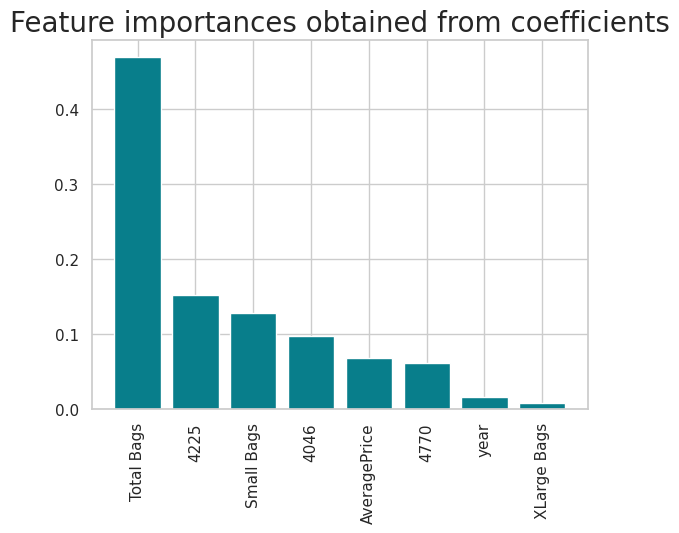

In [259]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

**Here we notice that, "Total Bags" has been the most important feature followed by "4225".**

####**SHAP Analysis for the Randomforest Regressor Model**

In [260]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

ExactExplainer explainer: 1826it [06:45,  4.39it/s]


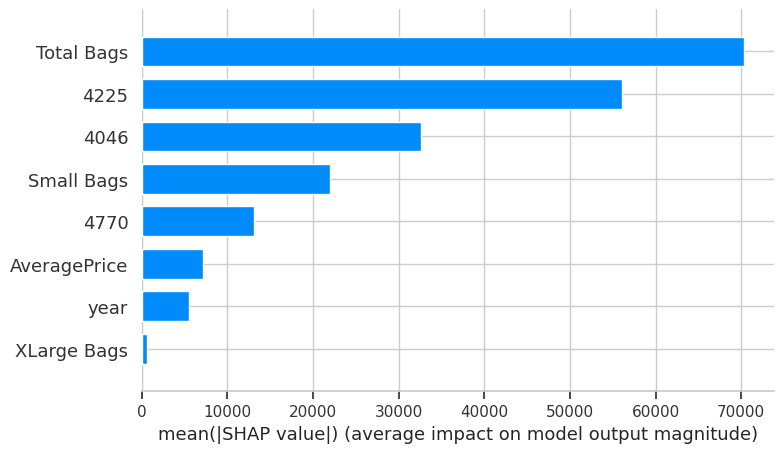

In [261]:
# shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_test, plot_type="bar")

From the plot above, it is known that **"Total Bags"** is the most effective feature in the Random Forest regressor model, followed by **"4225".**

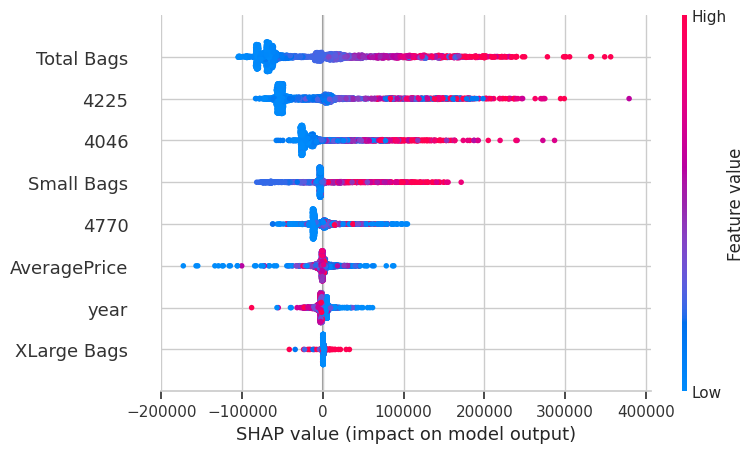

In [262]:
shap.summary_plot(shap_values, X_test)

1. Total Bags' has the most substantial influence on the model's predictions. A
mix of low and high values of 'Total Bags' spreads out on both sides of the zero line, indicating that it can both increase and decrease the predicted outcome depending on the specific value.

2. 'Small Bags' also has a significant impact, primarily contributing to an increase in the predicted value, as indicated by the dots predominantly positioned to the right of the zero line.

3. '4225', '4046', and '4770' appear to be product size codes and show varying degrees of influence. The cluster of dots for these features suggests a mix of positive and negative impacts on the model's predictions.

4. 'AveragePrice' and 'Year' have a smaller spread of SHAP values, suggesting a more moderate influence on the prediction outcomes. The clustering near the zero line indicates their effect is not as pronounced as 'Total Bags' or 'Small Bags'.

5. 'XLarge Bags' appears to have the least impact on the model's output, with SHAP values clustered close to the zero line and a narrow spread, suggesting that changes in 'XLarge Bags' values do not significantly alter the prediction.

The color gradient from blue to pink represents the low to high feature values, respectively, giving insight into how the magnitude of each feature's value influences the model's prediction.

The base value in the below waterfall plot is given as 170232.545, which is the average predicted value of the Total Volume.

"Total Bags" decreases the expectancy of the predicted feature/variable significantly, whereas, "year" increases the Life expectancy rate the most out of all the other variables.

**"Total Bags", "4225", "4046", "4770", and "Small Bags"** are responsible for the **decrease in Total Volume**, while the other features like **"year", "Average Price", and "XLarge Bags"** are responsible for **increase in Total Volume.**

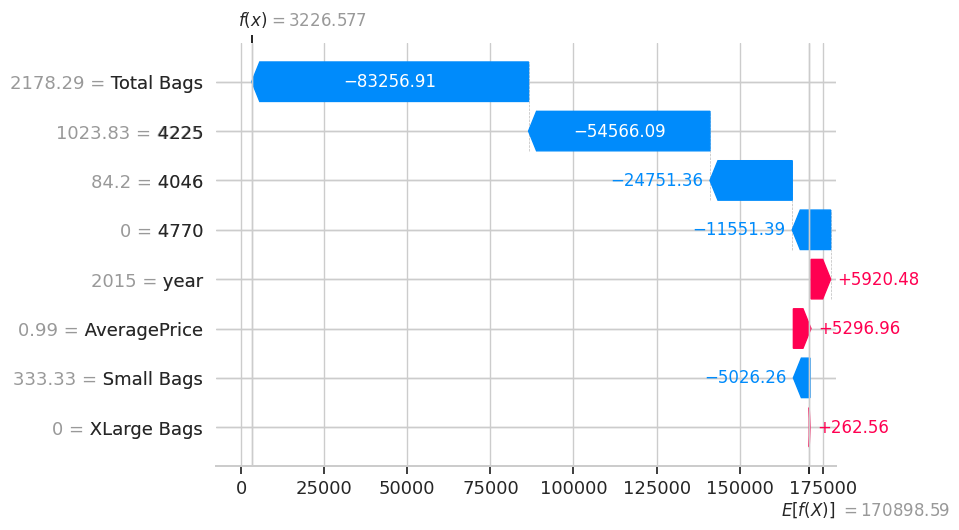

In [263]:
#Waterfall Plot
idx = 18
shap.plots.waterfall(shap_values[idx], max_display=14)

####**AutoML**

In [264]:
!pip install --no-cache-dir flask --user

In [265]:
!pip install h2o

In [266]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 57 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_wdut1h
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.043 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [267]:
data = h2o.H2OFrame(pandas_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [268]:
data.head()

AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1.33,64236.6,1036.74,54454.8,48.16,8696.87,8603.62,93.25,0,0,2015,0
1.35,54877,674.28,44638.8,58.33,9505.56,9408.07,97.49,0,0,2015,0
0.93,118220,794.7,109150,130.5,8145.35,8042.21,103.14,0,0,2015,0
1.08,78992.1,1132,71976.4,72.58,5811.16,5677.4,133.76,0,0,2015,0
1.28,51039.6,941.48,43838.4,75.78,6183.95,5986.26,197.69,0,0,2015,0
1.26,55979.8,1184.27,48068,43.61,6683.91,6556.47,127.44,0,0,2015,0
0.99,83453.8,1368.92,73672.7,93.26,8318.86,8196.81,122.05,0,0,2015,0
0.98,109428,703.75,101815,80,6829.22,6266.85,562.37,0,0,2015,0
1.02,99811.4,1022.15,87315.6,85.34,11388.4,11104.5,283.83,0,0,2015,0
1.07,74338.8,842.4,64757.4,113,8625.92,8061.47,564.45,0,0,2015,0


In [269]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [270]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [271]:
drift_data["is_train"].table()

is_train,Count
0,4509
1,13740


In [272]:
x = list(set(train.col_names) - set(["Total Volume"]))

In [273]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="Total Volume", training_frame=train)

AutoML progress: |
04:01:18.698: _train param, Dropping bad and constant columns: [is_train]

██
04:01:37.204: _train param, Dropping bad and constant columns: [is_train]
04:01:38.109: _train param, Dropping bad and constant columns: [is_train]

███
04:02:11.100: _train param, Dropping bad and constant columns: [is_train]


04:02:20.313: _train param, Dropping bad and constant columns: [is_train]

███
04:02:47.726: _train param, Dropping bad and constant columns: [is_train]


04:03:00.318: _train param, Dropping bad and constant columns: [is_train]

█
04:03:10.444: _train param, Dropping bad and constant columns: [is_train]

██
04:03:22.185: _train param, Dropping bad and constant columns: [is_train]

█
04:03:36.266: _train param, Dropping bad and constant columns: [is_train]

██
04:04:15.596: _train param, Dropping unused columns: [is_train]


04:04:17.895: _train param, Dropping unused columns: [is_train]

█████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_2_20231212_40118


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    41                 41                          3.10747e+06            20           20           20            5218          6836          6025.2

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 6557850899.229205
RMSE: 80980.55877325869
MAE: 24212.051772949028
RMSLE: 0.23761308407870843
Mean Residual Deviance: 6557850899.229205

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 6132778852.066955
RMSE: 78312.06070629833
MAE: 23371.410629841055
RMSLE: 0.22983054437704892
Mean Residual Deviance: 6132778852.066955

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     23319.4      725.859      24059.8       23105.5       22458.2       24085         22888.4
mean_residual_deviance  6.14745e+09  4.84644e+08  5.81512e+09   6.25875e+09   6.17844e+09   6.87401e+09   5.61095e+09
mse                     6.14745e+09  4.84644e+08  5.81512e+09   6.25875e+09   6.17844e+09   6.87401e+09   5.61095e+09
r2                      0.879424     0.00680995   0.885437      0.878498      0.879412      0.868653      0.885122
residual_deviance       6.14745e+09  4.84644e+08  5.81512e+09   6.25875e+09   6.17844e+09   6.87401e+09   5.61095e+09
rmse                    78357.6      3069.02      76256.9       79112.2       78603.1       82909.7       74906.2
rmsle                   0.229317     0.00795917   0.238733      0.228416      0.217117      0.229122      0.233196

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-12-12 04:02:43  23.482 sec  0                  nan              nan             nan
    2023-12-12 04:02:44  23.944 sec  5                  106312           30508.1         1.13022e+10
    2023-12-12 04:02:44  24.403 sec  10                 94173.5          27842.2         8.86865e+09
    2023-12-12 04:02:45  24.875 sec  15                 88370            26214.5         7.80926e+09
    2023-12-12 04:02:45  25.364 sec  20                 86054            25761.4         7.4053e+09
    2023-12-12 04:02:46  25.850 sec  25                 83941.4          25185.8         7.04615e+09
    2023-12-12 04:02:46  26.323 sec  30                 82433.1          24736.7         6.79521e+09
    2023-12-12 04:02:47  26.817 sec  35                 81991.8          24502.7         6.72266e+09
    2023-12-12 04:02:47  27.288 sec  40                 81142.5          24294.6         6.5841e+09
    2023-12-12 04:02:47  27.399 sec  41                 80980.6          24212.1         6.55785e+09

Variable Importances: 
variable      relative_importance    scaled_importance    percentage
------------  ---------------------  -------------------  ------------
Small Bags    4.85778e+15            1                    0.223687
4225          4.31238e+15            0.887726             0.198573
Total Bags    3.88195e+15            0.799121             0.178753
4046          2.48135e+15            0.5108               0.114259
4770          1.50238e+15            0.309273             0.0691805
region        1.25348e+15            0.258035             0.0577191
type          1.16824e+15            0.240489             0.0537944
AveragePrice  9.07377e+14          

In [274]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
DRF_1_AutoML_2_20231212_40118,23371.4,78312.1,6.13278e+09,0.229831,6.13278e+09
XRT_1_AutoML_2_20231212_40118,23640.6,78205.5,6.1161e+09,0.230637,6.1161e+09
StackedEnsemble_BestOfFamily_1_AutoML_2_20231212_40118,23839.5,76590.5,5.8661e+09,nan,5.8661e+09
StackedEnsemble_AllModels_1_AutoML_2_20231212_40118,24085.1,76607.7,5.86874e+09,nan,5.86874e+09
GBM_4_AutoML_2_20231212_40118,24850.7,78872.5,6.22087e+09,nan,6.22087e+09
GBM_3_AutoML_2_20231212_40118,26115,80223.9,6.43587e+09,nan,6.43587e+09
GBM_2_AutoML_2_20231212_40118,27453,80993.3,6.55991e+09,nan,6.55991e+09
XGBoost_2_AutoML_2_20231212_40118,30103.1,84693.3,7.17295e+09,nan,7.17295e+09
XGBoost_1_AutoML_2_20231212_40118,31010.6,85341.5,7.28316e+09,nan,7.28316e+09
GBM_1_AutoML_2_20231212_40118,31965.5,84762.4,7.18467e+09,nan,7.18467e+09


In [275]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 5297891490.205476
RMSE: 72786.61614751352
MAE: 21907.0572764208
RMSLE: 0.2291492140378303
Mean Residual Deviance: 5297891490.205476

In [276]:
# Help function
class H2OProbWrapper:
    def __init__(self, h2o_model, feature_names):
        self.h2o_model = h2o_model
        self.feature_names = feature_names

    def predict_binary_prob(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        self.dataframe= pd.DataFrame(X, columns=self.feature_names)
        self.predictions = self.h2o_model.predict(h2o.H2OFrame(self.dataframe)).as_data_frame().values
        return self.predictions.astype('float64')[:,-1] #probability of True class


In [277]:
#reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/Pritika-24/Combined-Data-Cleaning-Feature-Selection-Modeling-and-Interpretability/main/avocado.csv')

In [278]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [281]:
data = data.drop(columns=['Unnamed: 0'])

In [283]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of columns to label encode
columns_to_encode = ['Date', 'type', 'region']

# Apply label encoding to each column
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [284]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [286]:
X = data[ ['AveragePrice', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'XLarge Bags', 'year']]
y = data['Total Volume']

#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [287]:
feature_names = list(X_train.columns)
h2o_wrapper = H2OProbWrapper(best_model,feature_names)

In [288]:
explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob,X_train[:50])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


In [289]:
shap_values = explainer.shap_values(X_test[:50])


  0%|          | 0/50 [00:00<?, ?it/s]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |

Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN
Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Large Bags': substituting in a column of NaN
Test/Validation dataset is missing column 'type': substituting in a column of NaN
Test/Validation dataset is missing column 'region': substituting in a column of NaN


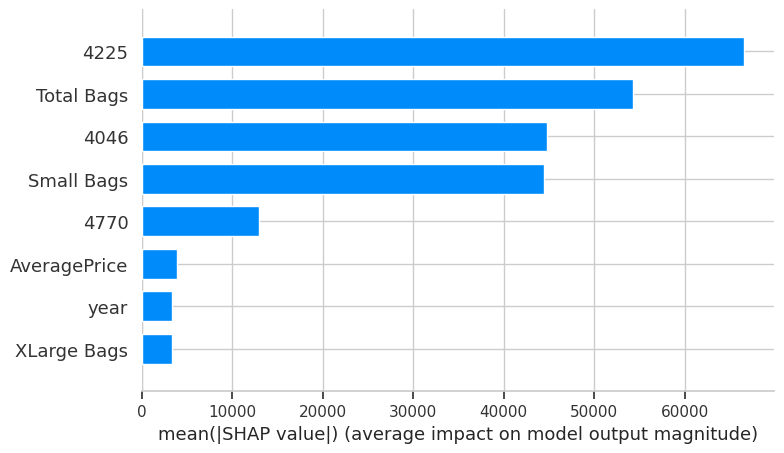

In [290]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

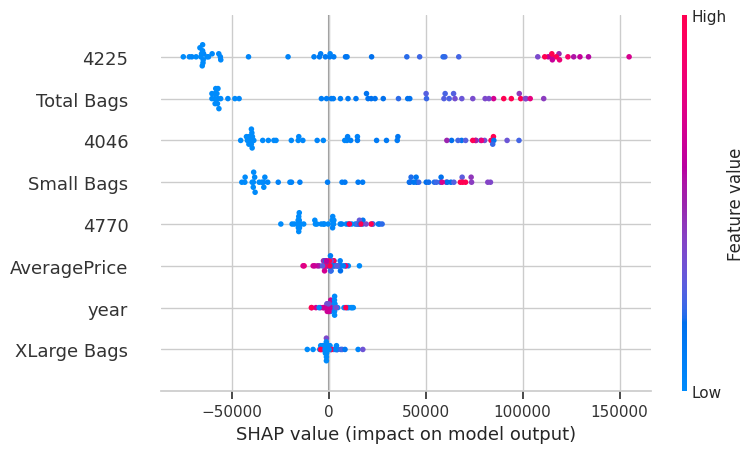

In [291]:
shap.summary_plot(shap_values, X_test[:50])


1. From the two plots above, we can know that Total Bags is the most effective feature in Random Forest model, when it's value is larger than average, it drives the prediction to the right.

2. Here the data points are sparsely distanced with a more or less similar trend to the previous two models.

3. 4225, Small bags, 4046, 4770 and XLarge Bags works similar to Total Bags, however, Average Price and year work the opposite.

##**The following questions must be answered:**

1. **What is the question?**

The primary inquiry for this analysis could be:

"How can we predict the total volume of avocados sold based on a set of features such as average price, type and region?"

To delve deeper, we might consider questions like:

- Does the type of avocado (conventional or organic) significantly influence the price?
- How do sales and seasonal trends affect avocado pricing across different regions?

2. **What did you do?**

Data Cleaning:

- Identified and handled missing values, if any.
- Addressed any outliers or anomalies in the dataset.
- Standardized or normalized numerical features if necessary.
- Encoded categorical variables using one-hot encoding.

Exploratory Data Analysis (EDA):

- Explored the distribution of health and development indicators.
- Identified correlations between different features and the target variable.
- Visualized trends and patterns in the data.

Feature Selection:

- Used techniques like correlation analysis, feature elimination, or feature importance from machine learning models.
- Selected a subset of features that have the most significant impact on the health outcome.

Modeling:

- Split the dataset into training and testing sets.
- Selected a suitable machine learning model (e.g., regression, decision tree, random forest) for prediction.
- Trained the model on the training set.
- Evaluated the model's performance on the testing set using appropriate metrics (e.g., root mean squared error, accuracy).

Interpretability:

- Used model interpretability tools such as SHAP (SHapley Additive exPlanations) values to understand how the model makes predictions.
- Visualized the contributions of different features to the model predictions.
- Summarized and interpreted the results in a meaningful way.



3. **How well did it work?**

- The model’s performance was evaluated using metrics like R-squared and Mean Absolute Error (MAE).
- Assessed the residuals and conducted cross-validation to ensure the model's robustness.
- Assessed the interpretability tools to ensure a clear understanding of feature contributions.



4. **What did you learn?**

- From the analysis, key drivers for the total volume of avocado sales were identified, which included the average price, the type of avocado (organic vs. conventional), and regional buying patterns.
- The influence of seasonality on purchasing behavior was evident, indicating times of peak demand which could be critical for inventory and pricing strategies.
- Insights were gained into how economic indicators and consumer trends potentially interact with the supply chain dynamics to affect the volume of sales.
- The criticality of interpretability in modeling became clear, as it helped to explain the quantitative relationship between features and the total volume sold, ensuring the model's predictions are both reliable and actionable for decision-makers.

#**License**

Copyright 2023 Pritika-24

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.